## Load Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # subplots
import seaborn as sns 

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn import metrics 

: 

## Load Data 

In [40]:
df = pd.read_csv("BGG100.csv",header = 0, encoding= 'unicode_escape', index_col='Rank')

In [28]:
df.head()

Rating                               Name  \
Rank                                              
1      8.511                        Gloomhaven    
2      8.442          Pandemic Legacy: Season 1   
3      8.418                  Brass: Birmingham   
4      8.273                  Terraforming Mars   
5      8.262  Twilight Imperium: Fourth Edition   

                                               Subtitle  Year  MinPlayers  \
Rank                                                                        
1     Vanquish monsters with strategic cardplay. Ful...  2017           1   
2     Mutating diseases are spreading around the wor...  2015           2   
3     Build networks, grow industries, and navigate ...  2018           2   
4     Compete with rival CEOs to make Mars habitable...  2016           1   
5     Build an intergalactic empire through trade, r...  2017           3   

      MaxPlayers BestPlayers  MinPlayTime  MaxPlayTime  MinAge  Weight  \
Rank                                                                     
1              4           3           60          120      14    3.87   
2              4           4           60           60      13    2.83   
3              4        3, 4           60          120      14    3.90   
4              5           3          120          120      12    3.24   
5              6           6          240          480      14    4.26   

                     Type  
Rank                       
1     Strategy,  Thematic  
2     Strategy,  Thematic  
3               Strategy   
4               Strategy   
5     Strategy,  Thematic

## Data cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Name         100 non-null    object 
 2   Subtitle     100 non-null    object 
 3   Year         100 non-null    int64  
 4   MinPlayers   100 non-null    int64  
 5   MaxPlayers   100 non-null    int64  
 6   BestPlayers  100 non-null    object 
 7   MinPlayTime  100 non-null    int64  
 8   MaxPlayTime  100 non-null    int64  
 9   MinAge       100 non-null    int64  
 10  Weight       100 non-null    float64
 11  Type         100 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 10.2+ KB


In [45]:
#dividing target variable from the other parameters
X = df[df.columns[1:12]]
y =  df[df.columns[0]]

In [55]:
#numerating the string values and dropping names

for index, value in X['BestPlayers'].items():
    if value == 'None':
        X.at[index, 'BestPlayers'] = 0
    elif isinstance(value, str):
        value_list = value.strip().split(',')
        if len(value_list) == 1:
            X.at[index, 'BestPlayers'] = int(value_list[0])
        elif len(value_list) == 2:
            start, end = int(value_list[0]), int(value_list[1])
            X.at[index, 'BestPlayers'] = list(range(start, end))
X_numbers =  X[X.columns[2:11]]

In [81]:
uniqueWords = set()
for i in X['Type']:
    i = i.replace("\xa0\xa0", " ").replace("\xa0", " ").strip().split(',')
    for word in i:
        uniqueWords.add(word.strip())

res = list(uniqueWords)
print(res)


['Abstract', 'Strategy', 'Family', 'Customizable', 'Party', 'Wargames', 'Thematic']


In [56]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         100 non-null    object 
 1   Subtitle     100 non-null    object 
 2   Year         100 non-null    int64  
 3   MinPlayers   100 non-null    int64  
 4   MaxPlayers   100 non-null    int64  
 5   BestPlayers  100 non-null    object 
 6   MinPlayTime  100 non-null    int64  
 7   MaxPlayTime  100 non-null    int64  
 8   MinAge       100 non-null    int64  
 9   Weight       100 non-null    float64
 10  Type         100 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 13.4+ KB


I removed cols with zero standard deviation (size_x, size_y, size_z, spacing_x, spacing_y, spacing_z)

In [42]:
X.describe()

Year  MinPlayers  MaxPlayers  MinPlayTime  MaxPlayTime  \
count   100.000000  100.000000  100.000000   100.000000   100.000000   
mean   2012.890000    1.610000    4.420000    67.550000   131.150000   
std      14.665217    0.601261    1.084137    38.055615   107.350683   
min    1876.000000    1.000000    2.000000     5.000000    20.000000   
25%    2012.000000    1.000000    4.000000    40.000000    90.000000   
50%    2015.500000    2.000000    4.000000    60.000000   120.000000   
75%    2018.000000    2.000000    5.000000    90.000000   150.000000   
max    2020.000000    3.000000    8.000000   240.000000  1000.000000   

           MinAge      Weight  
count  100.000000  100.000000  
mean    12.640000    3.322400  
std      1.540825    0.698233  
min      8.000000    1.250000  
25%     12.000000    2.875000  
50%     13.000000    3.400000  
75%     14.000000    3.825000  
max     17.000000    4.650000

## Are there outliers?
After a StandardScaler,  in order to easily compare the data, I want to determine if there are any outliers in the data set.

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features =scaler.fit_transform(X.values)
df_features_scaled = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)


ValueError: could not convert string to float: 'Gloomhaven\xa0'

In [221]:
##normalization
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

for col in df_features_drop.columns:
    df_features_drop[col] = min_max_scaling(df_features_drop[col])
df_features_drop

cjv       cnr       efc      fber  fwhm_avg    fwhm_x    fwhm_y  \
0    0.091698  0.775819  0.416088  0.865704  0.609117  0.599777  0.688494   
1    0.218018  0.577572  0.477428  0.325984  0.631399  0.607142  0.727701   
2    0.338743  0.400859  0.548015  0.162331  0.576615  0.542356  0.641008   
3    0.147874  0.672466  0.353901  0.346131  0.490917  0.531790  0.534658   
4    0.825168  0.095841  0.528132  0.059515  0.452915  0.479722  0.474430   
..        ...       ...       ...       ...       ...       ...       ...   
431  0.150710  0.670996  0.543059  0.312233  0.709289  0.737165  0.817637   
432  0.268867  0.490843  0.622530  0.069793  0.580210  0.591662  0.652688   
433  0.130247  0.674687  0.286638  0.674096  0.617263  0.633841  0.702284   
434  0.482440  0.291968  0.427630  0.140220  0.694467  0.694789  0.768734   
435  0.678539  0.158054  0.530247  0.082844  0.628678  0.627484  0.665272   

       fwhm_z  icvs_csf   icvs_gm  ...  summary_wm_mean  summary_wm_median  \
0    0.524808  0.247734  0.586229  ...         0.081648           0.000901   
1    0.543594  0.348691  0.527852  ...         0.235023           0.000631   
2    0.538124  0.307402  0.509141  ...         0.370927           0.382584   
3    0.392867  0.249874  0.625361  ...         0.182941           0.000090   
4    0.397182  0.416541  0.464878  ...         0.433764           0.000631   
..        ...       ...       ...  ...              ...                ...   
431  0.548660  0.652442  0.260130  ...         0.293011           0.000270   
432  0.480826  0.594663  0.284080  ...         0.347655           0.000721   
433  0.497161  0.437815  0.576393  ...         0.087514           0.000541   
434  0.605415  0.659617  0.373142  ...         0.416016           0.000451   
435  0.586326  0.610524  0.428419  ...         0.569990           0.000541   

     summary_wm_n  summary_wm_p05  summary_wm_p95  summary_wm_stdv  \
0        0.496304        0.685243        0.064973         0.139530   
1        0.495198        0.701337        0.172244         0.201510   
2        0.505758        0.543339        0.356842         0.377009   
3        0.295241        0.858455        0.040623         0.066722   
4        0.280763        0.527777        0.426703         0.428714   
..            ...             ...             ...              ...   
431      0.474136        0.783002        0.170631         0.168831   
432      0.493178        0.658746        0.288063         0.290857   
433      0.475349        0.632409        0.110571         0.189749   
434      0.479331        0.508160        0.438571         0.437804   
435      0.494584        0.362152        0.630100         0.620755   

     tpm_overlap_csf  tpm_overlap_gm  tpm_overlap_wm    wm2max  
0           0.822706        0.861114        0.831482  0.588131  
1           0.786065        0.848946        0.823706  0.422896  
2           0.737450        0.845979        0.812708  0.404766  
3           0.663589        0.809675        0.730504  0.661229  
4           0.688402        0.772876        0.703177  0.294169  
..               ...             ...             ...       ...  
431         0.798904        0.591849        0.644301  0.182580  
432         0.820687        0.574538        0.606976  0.218758  
433         0.864974        0.852607        0.829482  0.760428  
434         0.762406        0.765753        0.789824  0.633146  
435         0.677582        0.706301        0.673961  0.620715  

[436 rows x 62 columns]

c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


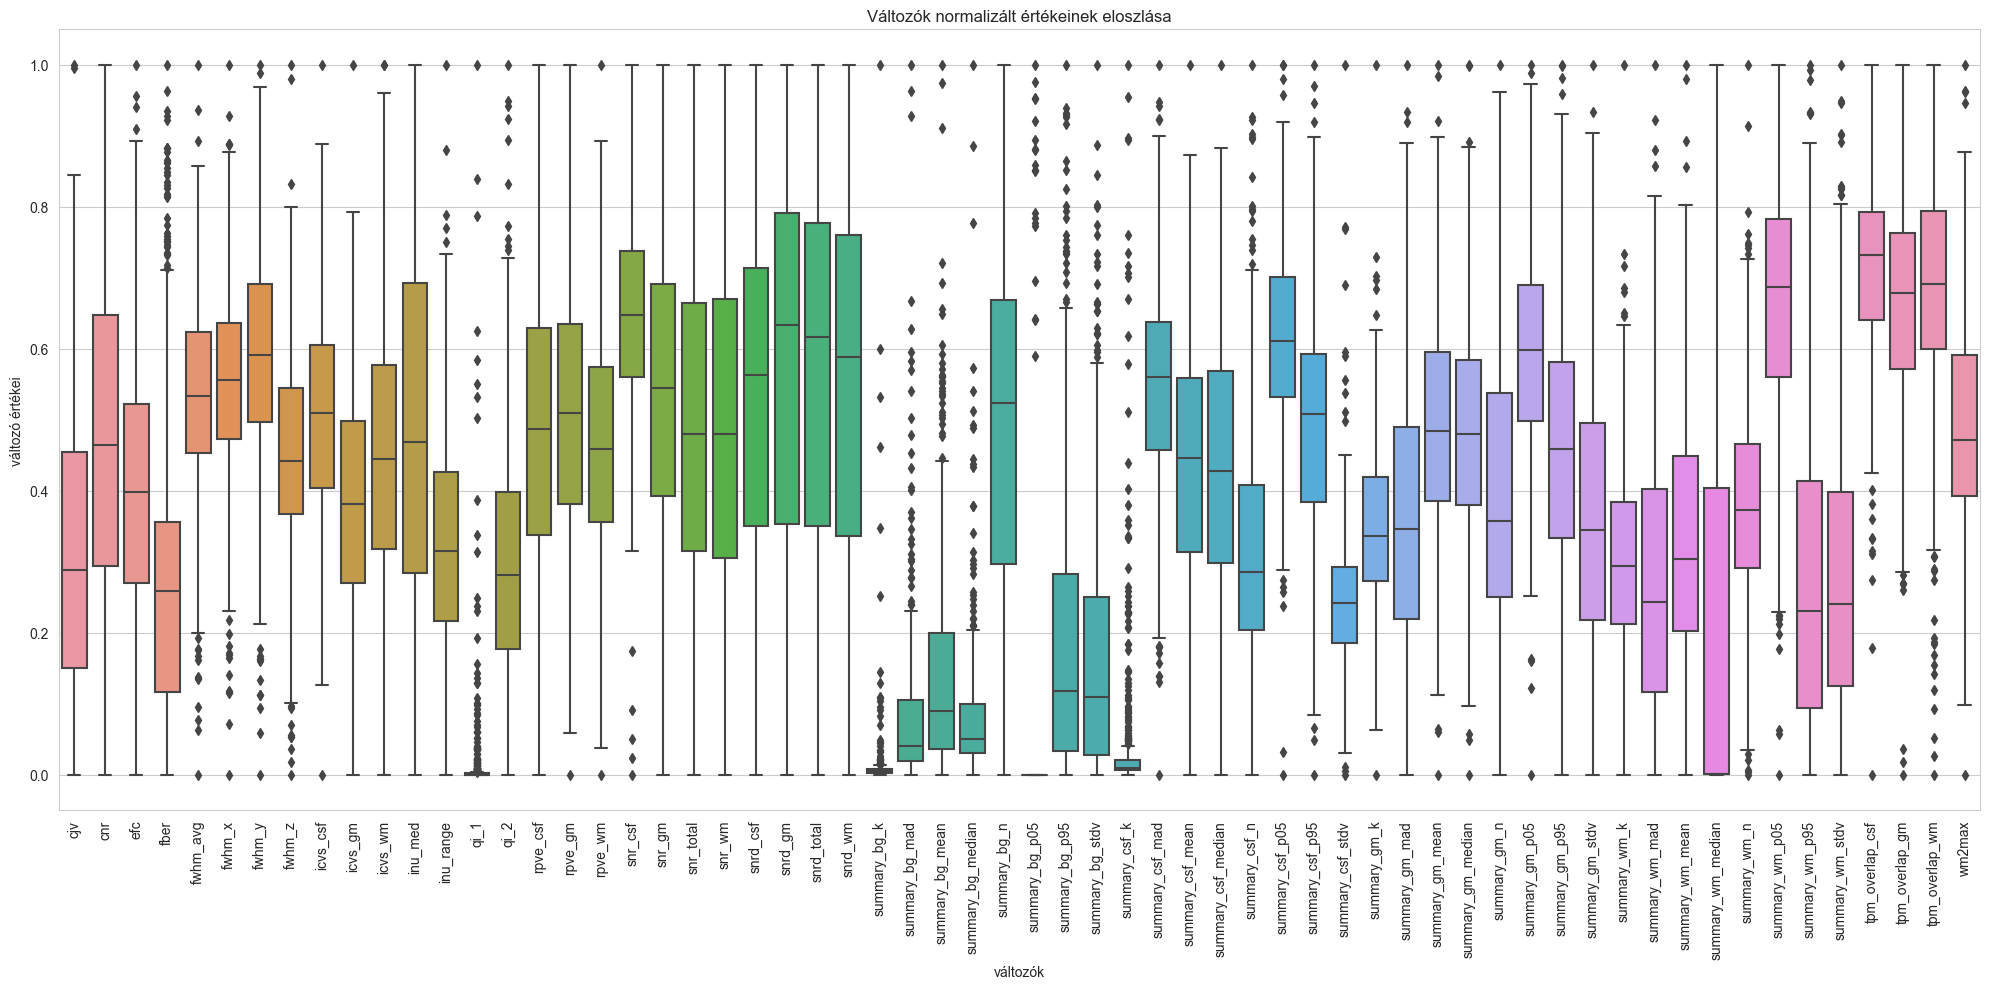

In [76]:
plt.figure(figsize=(20,10))
sns.boxplot( data = df_features_drop)
plt.ylabel('változó értékei')
plt.xlabel('változók')
plt.xticks(rotation=90) 
plt.title('Változók normalizált értékeinek eloszlása') 
plt.tight_layout()

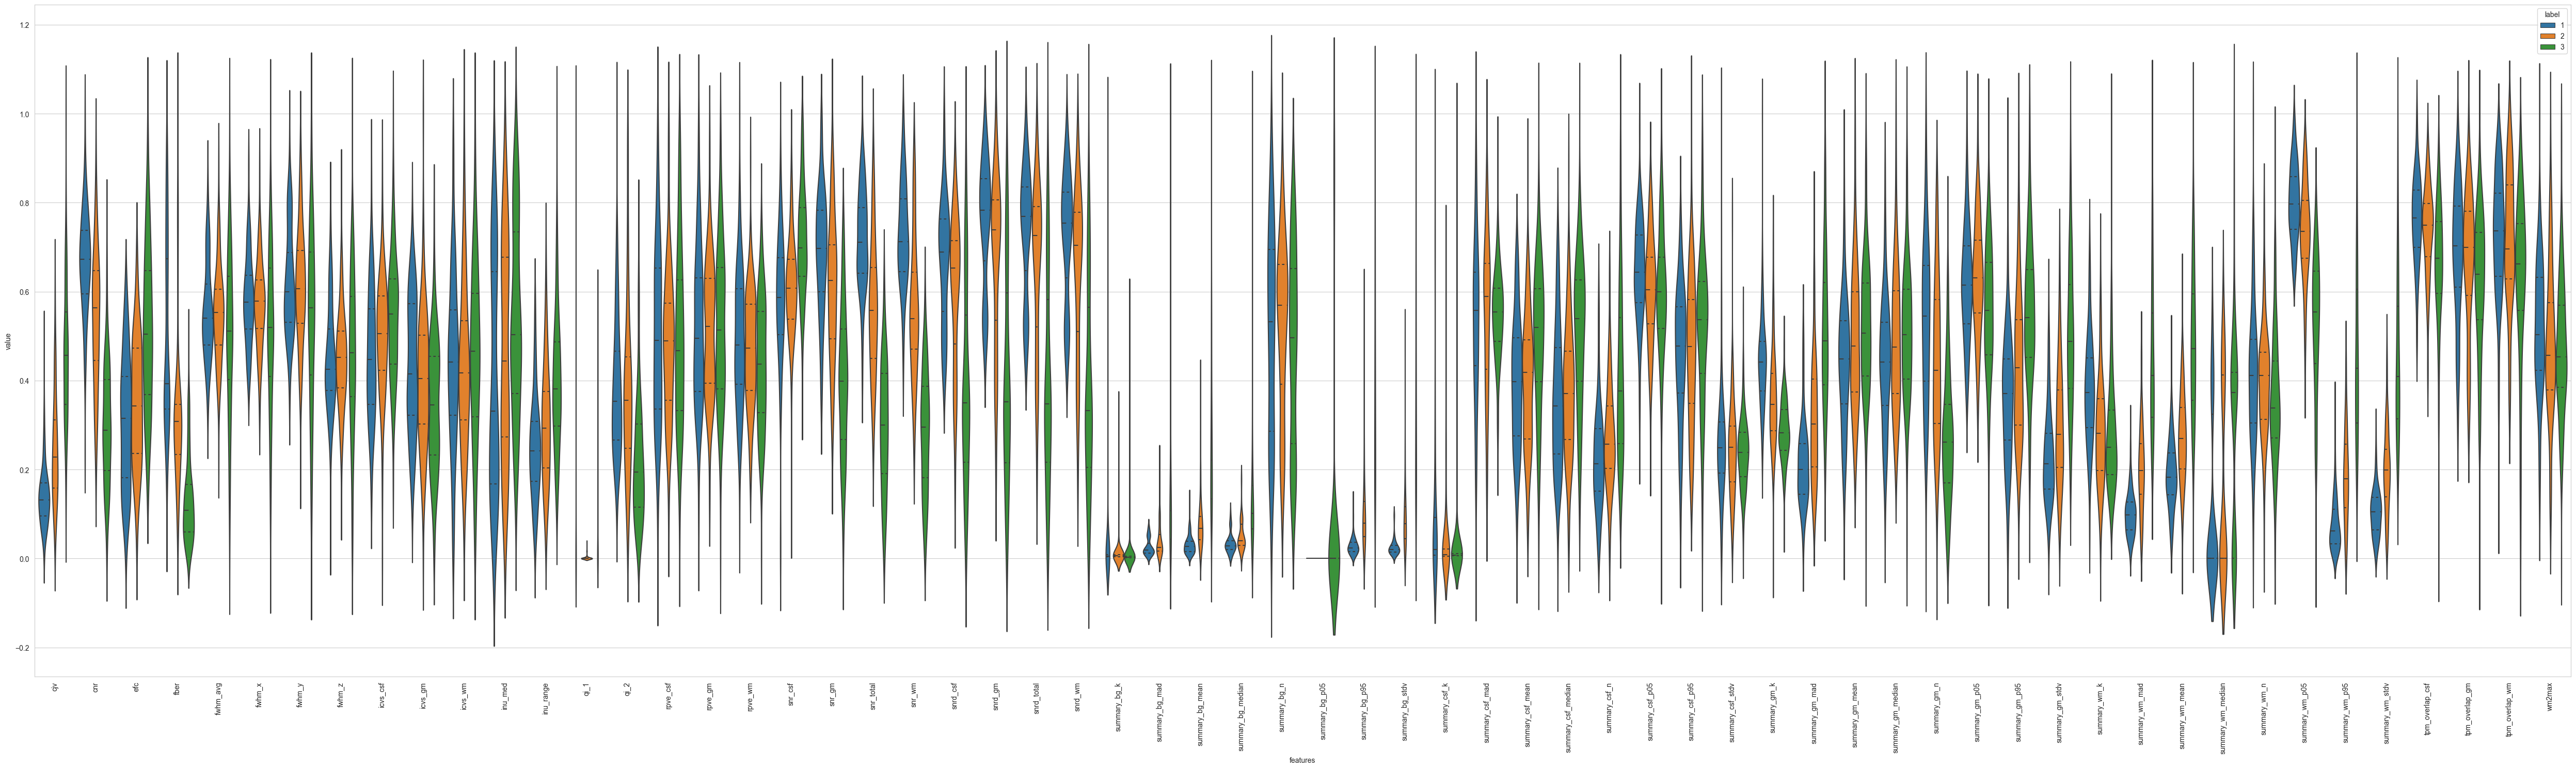

In [77]:
sns.set_style('whitegrid')
plt.figure(figsize=(50,15))
df_drop = df_features_drop.join(y)
data = pd.melt(df_drop, id_vars="label",var_name="features", value_name='value')
sns.violinplot(x="features", y="value", hue="label", data=data, inner="quart")
plt.xticks(rotation=90) 
plt.tight_layout()

c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

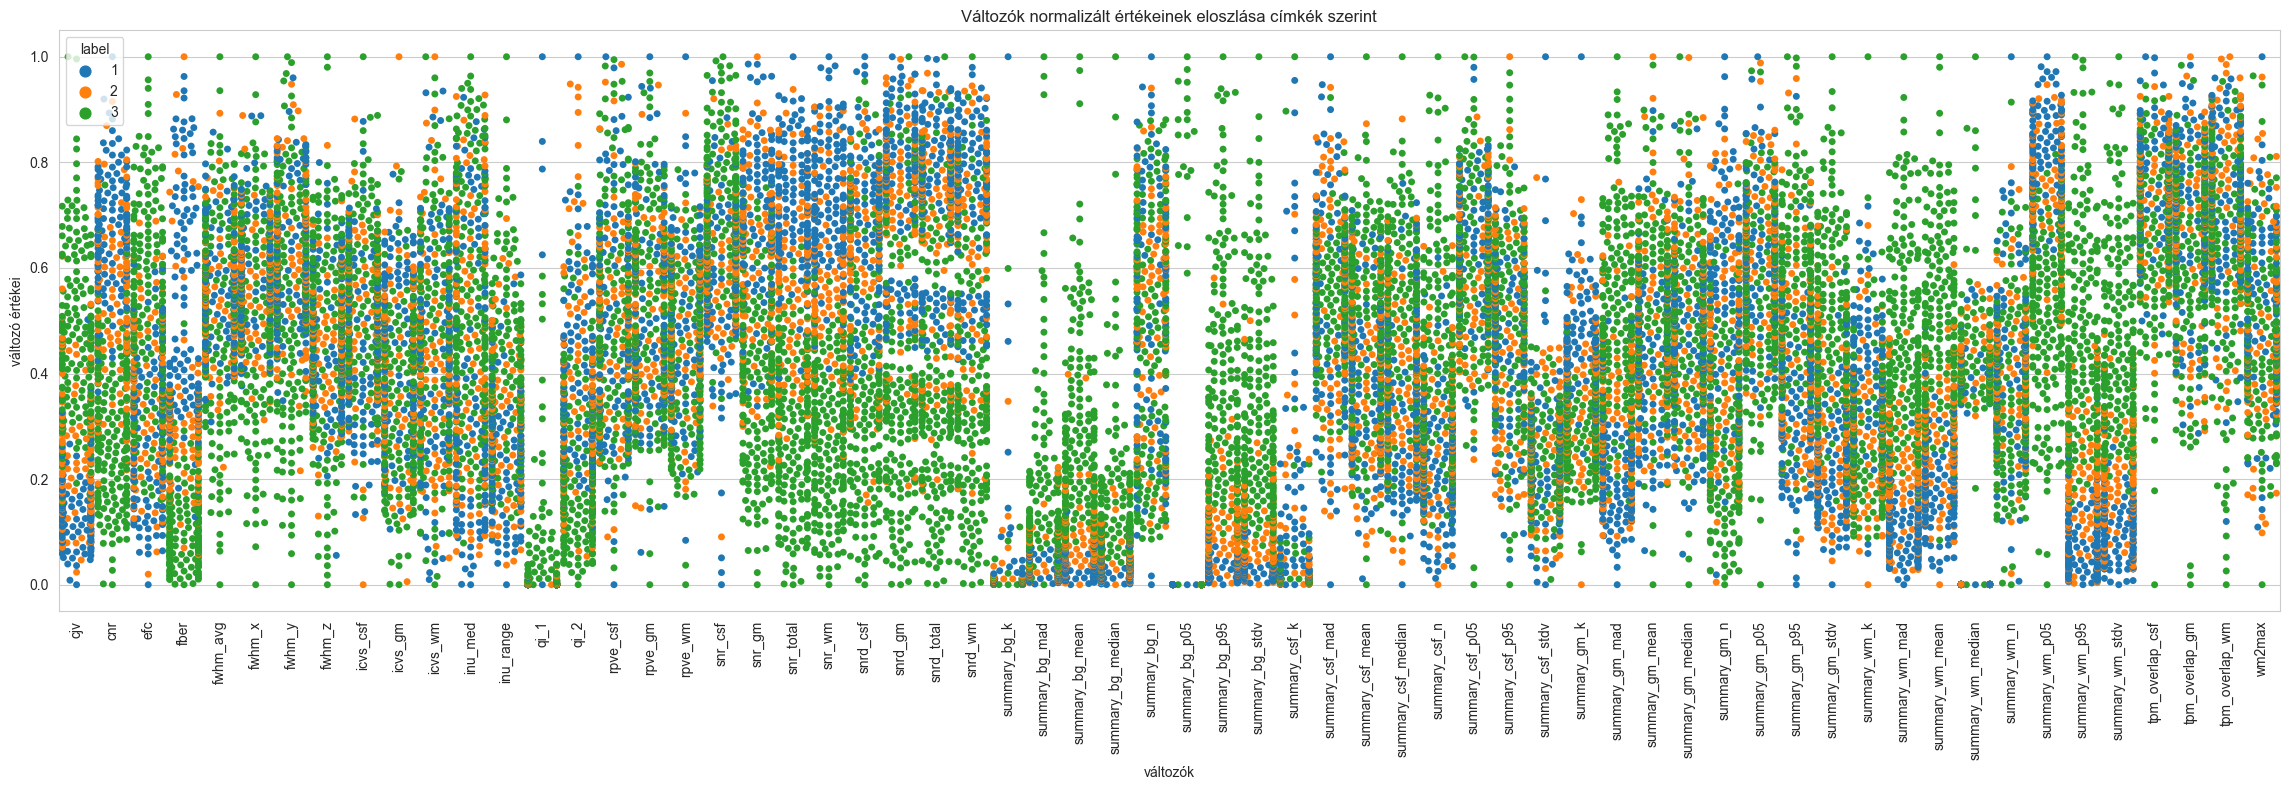

In [78]:
plt.figure(figsize=(23,8))
data = pd.melt(df_drop,id_vars="label",var_name="features", value_name='value')
sns.swarmplot(x="features", y="value", hue="label", data=data)
plt.xlabel('változók')
plt.ylabel('változó értékei')
plt.title('Változók normalizált értékeinek eloszlása címkék szerint') 
plt.xticks(rotation=90) 
plt.tight_layout()

Number of 1	:	  129
Number of 2	:	  109
Number of 3	:	  198
Percentage of Label_1	:	  29.59 %
Percentage of Label_2	:	  25.00 %
Percentage of Label_3	:	  45.41 %
Number of 1 (no outlier)	:	  121
Number of 2 (no outlier)	:	  109
Number of 3 (no outlier)	:	  193
Percentage of Label_1 (no outlier)	:	  28.61 %
Percentage of Label_2 (no outlier)	:	  25.77 %
Percentage of Label_3 (no outlier)	:	  45.63 %


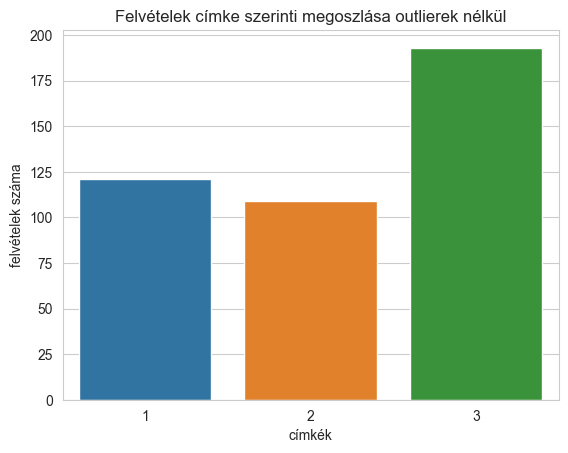

In [79]:
df_features_clean=df_features_drop[df_features_drop.apply(lambda x: np.abs(x - x.mean()) / x.std() < 6).all(axis=1)]
df_features_y_clean =df_features_clean.join(y)
df_y = df_features_y_clean.iloc[:,62]
Label_3, Label_1, Label_2 = df['label'].value_counts()   
Label_3_c, Label_1_c, Label_2_c = df_features_y_clean['label'].value_counts()
cp = sns.countplot(x = df_features_y_clean['label'],label="felvételek száma")
cp.set_xlabel('címkék')
cp.set_ylabel('felvételek száma')
cp.set_title('Felvételek címke szerinti megoszlása outlierek nélkül')  

print('Number of 1\t:\t ',Label_1)
print('Number of 2\t:\t ',Label_2)
print('Number of 3\t:\t ',Label_3)
print('Percentage of Label_1\t:\t % 2.2f %%' % (Label_1/(Label_1+Label_2+Label_3)*100))
print('Percentage of Label_2\t:\t % 2.2f %%' % (Label_2/(Label_1+Label_2+Label_3)*100))
print('Percentage of Label_3\t:\t % 2.2f %%' % (Label_3/(Label_1+Label_2+Label_3)*100))
print('Number of 1 (no outlier)\t:\t ',Label_1_c)
print('Number of 2 (no outlier)\t:\t ',Label_2_c)
print('Number of 3 (no outlier)\t:\t ',Label_3_c)
print('Percentage of Label_1 (no outlier)\t:\t % 2.2f %%' % (Label_1_c/(Label_1_c+Label_2_c+Label_3_c)*100))
print('Percentage of Label_2 (no outlier)\t:\t % 2.2f %%' % (Label_2_c/(Label_1_c+Label_2_c+Label_3_c)*100))
print('Percentage of Label_3 (no outlier)\t:\t % 2.2f %%' % (Label_3_c/(Label_1_c+Label_2_c+Label_3_c)*100))


# Correlations

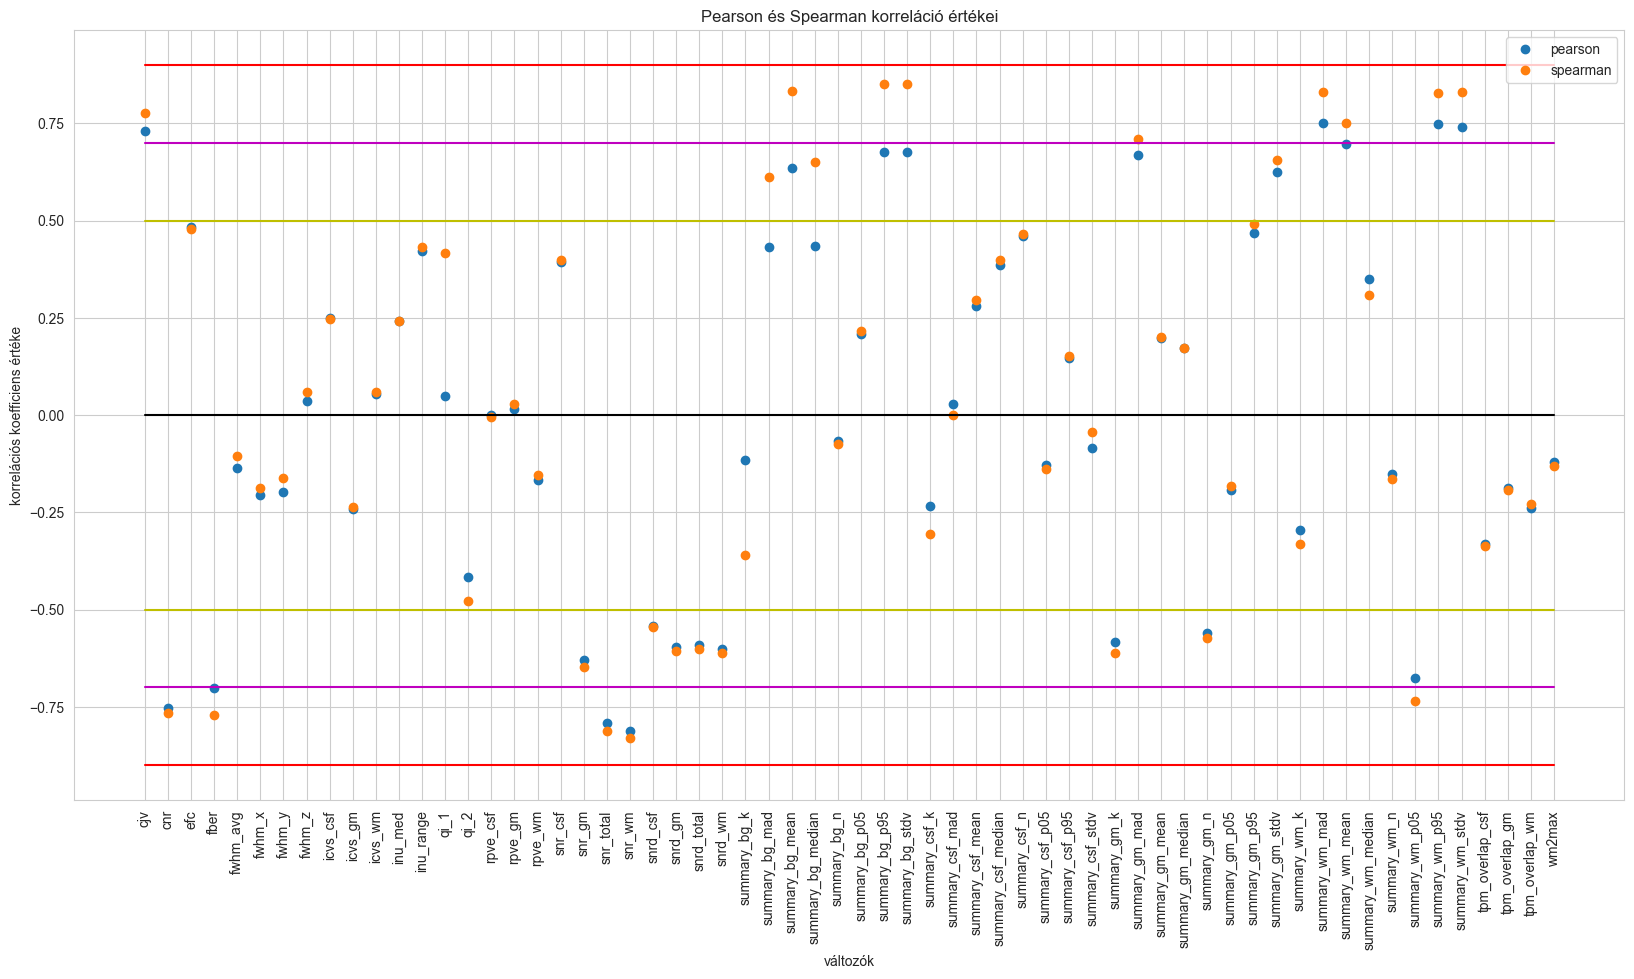

In [80]:
column_names = df_features_drop.columns
y_series = y.squeeze
scaled_df = df_features_drop.join(y)
pearson_corrs = scaled_df.corr(method='pearson')
pearson_corrs_label = pearson_corrs.drop(column_names, axis = 1).drop('label', axis = 0)
spearman_corrs = scaled_df.corr(method='spearman')
spearman_corrs_label = pearson_corrs.drop(column_names, axis = 1).drop('label', axis = 0)

corrs = pd.DataFrame()
corrs['pearson'] = pearson_corrs['label'].drop('label', axis = 0)
corrs['spearman'] = spearman_corrs['label'].drop('label', axis = 0)
#print(corrs)
zero = np.linspace(0,0, 62)
five = np.linspace(0.5,0.5, 62)
five_ = np.linspace(-0.5,-0.5, 62)
seven = np.linspace(0.7,0.7, 62)
seven_ = np.linspace(-0.7,-0.7, 62)
nine = np.linspace(0.9,0.9, 62)
nine_ = np.linspace(-0.9,-0.9, 62)
plt.figure(figsize=(20,10))
plt.plot(corrs, 'o') 
plt.xticks(rotation=90)
plt.plot(zero, 'k-')
plt.plot(five, 'y-')
plt.plot(seven, 'm-')
plt.plot(nine, 'r-')
plt.plot(five_, 'y-')
plt.plot(seven_, 'm-')
plt.plot(nine_, 'r-')
plt.ylabel('korrelációs koefficiens értéke')
plt.xlabel('változók')
plt.legend(['pearson','spearman'])
plt.title('Pearson és Spearman korreláció értékei')
plt.show()


<AxesSubplot: >

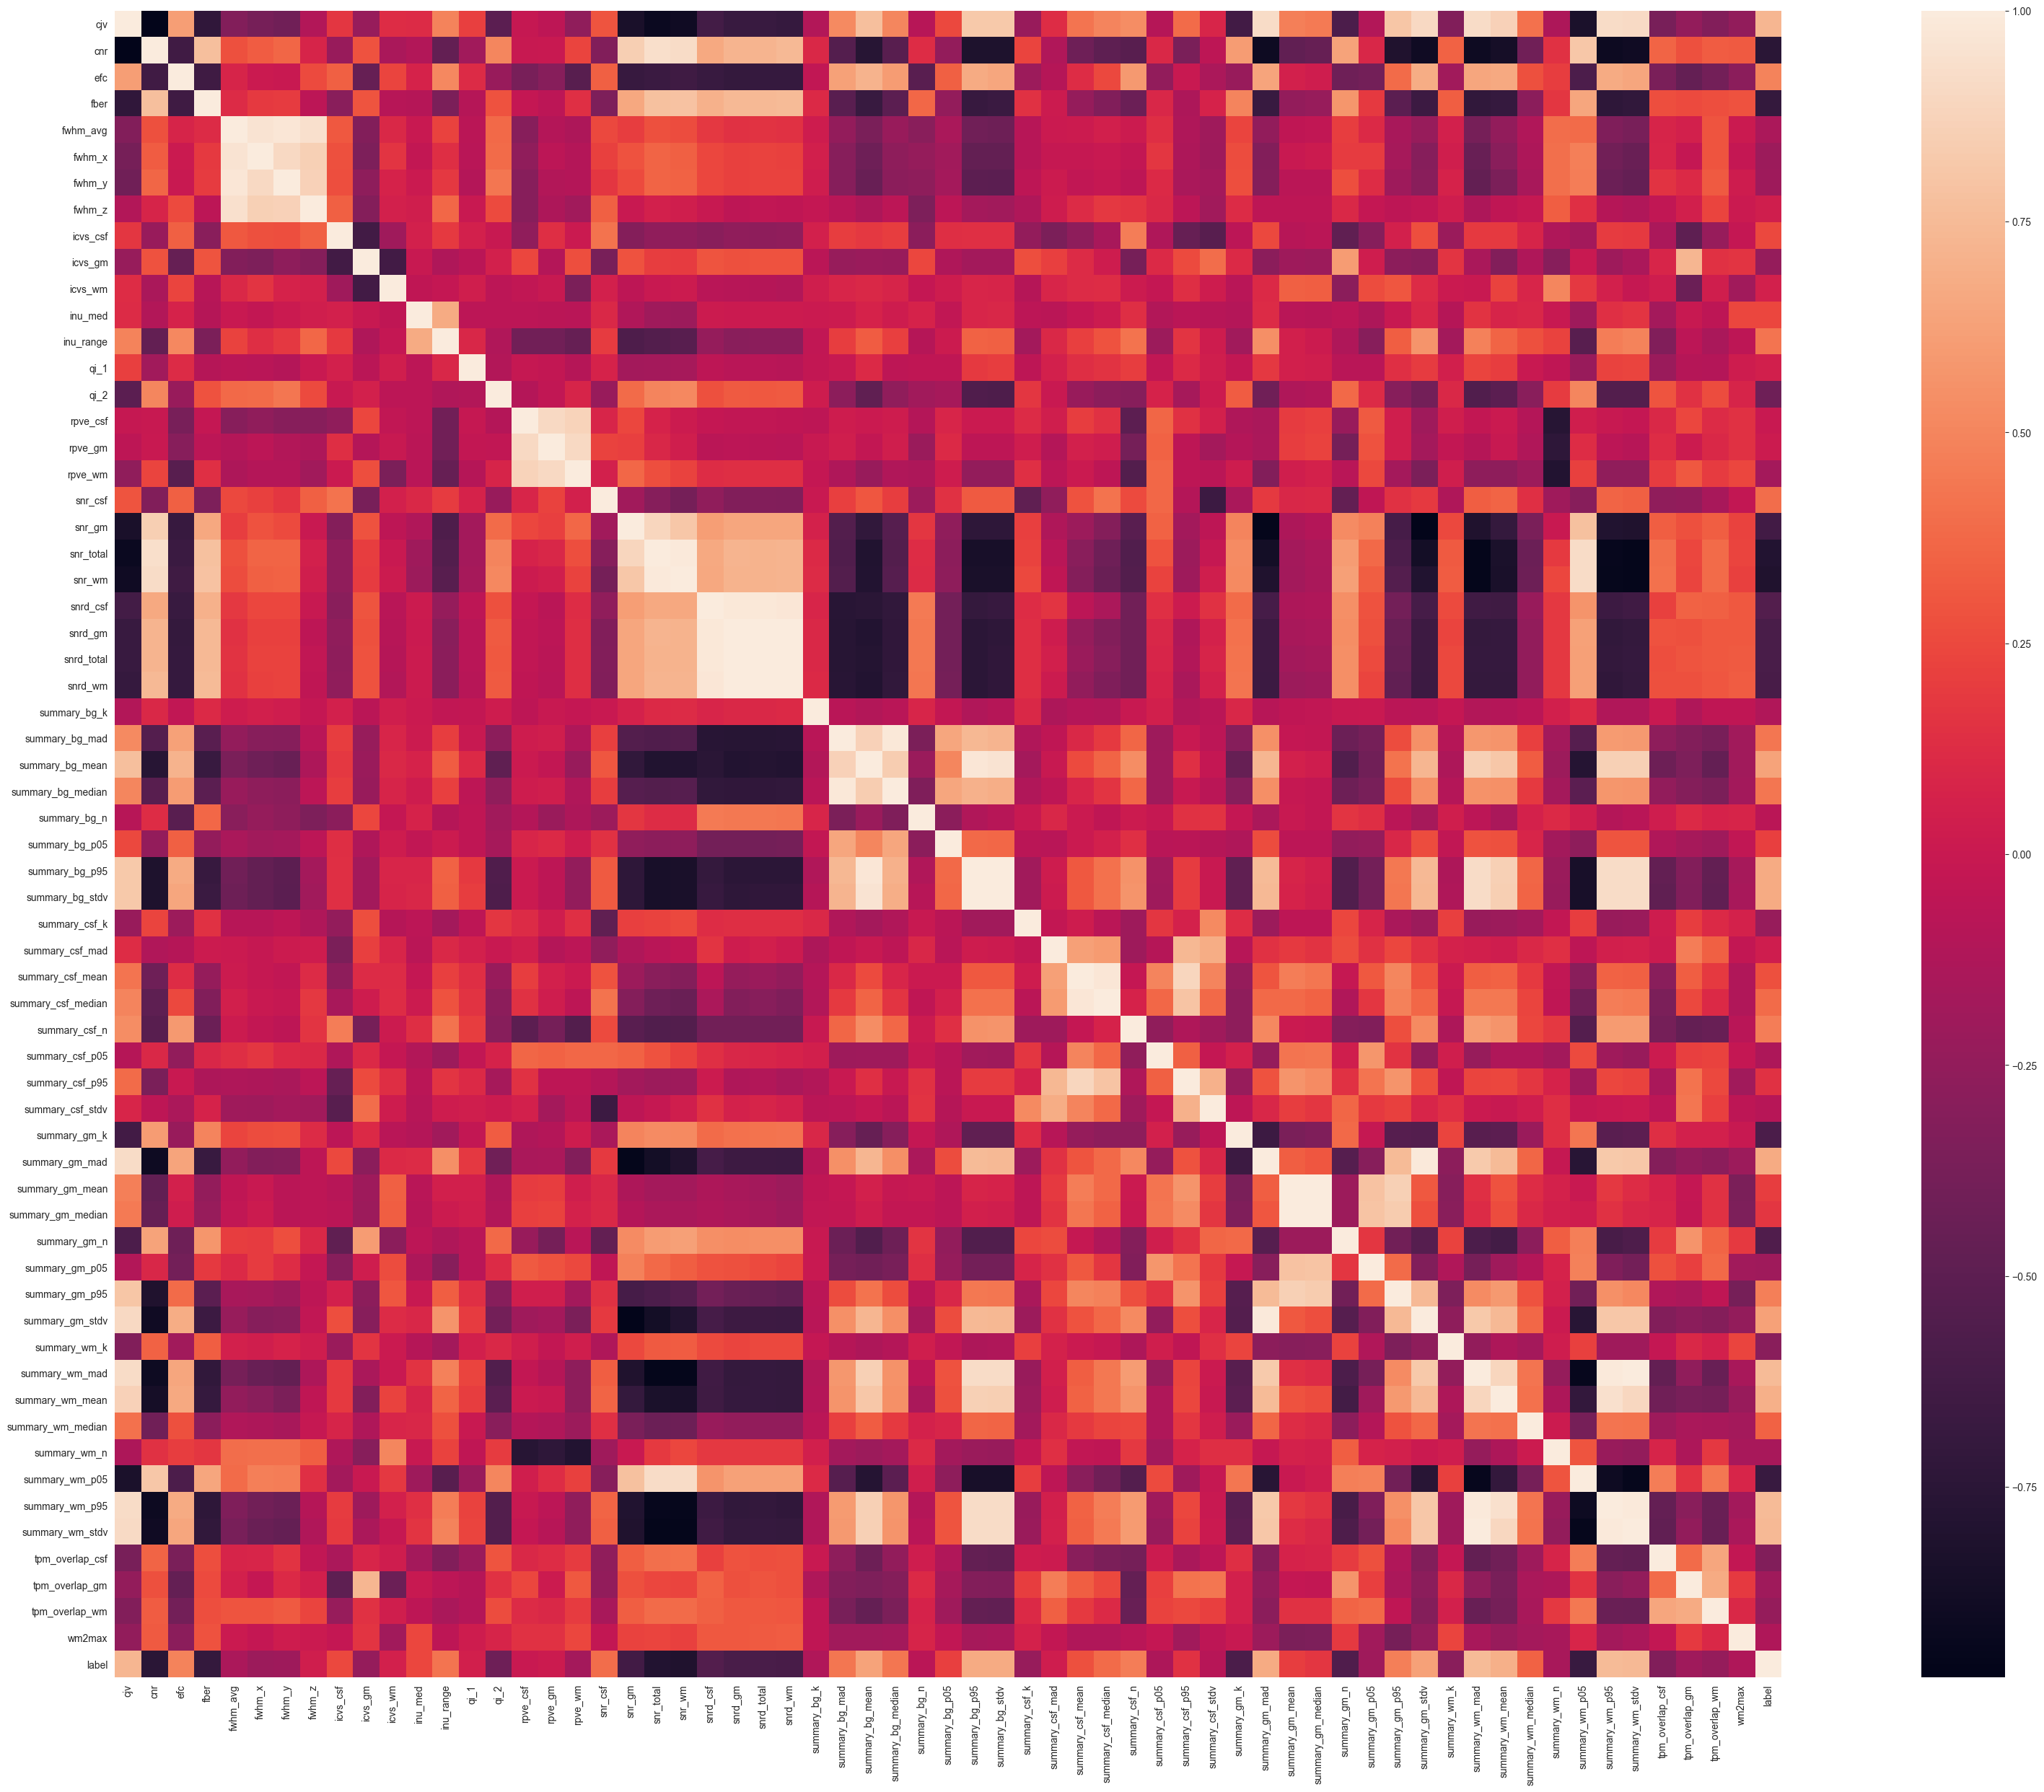

In [81]:
plt.figure(figsize=(50,30))
sns.heatmap( scaled_df.corr(method = 'pearson'),  square = True, fmt= '.2f',annot_kws={'size': 8})

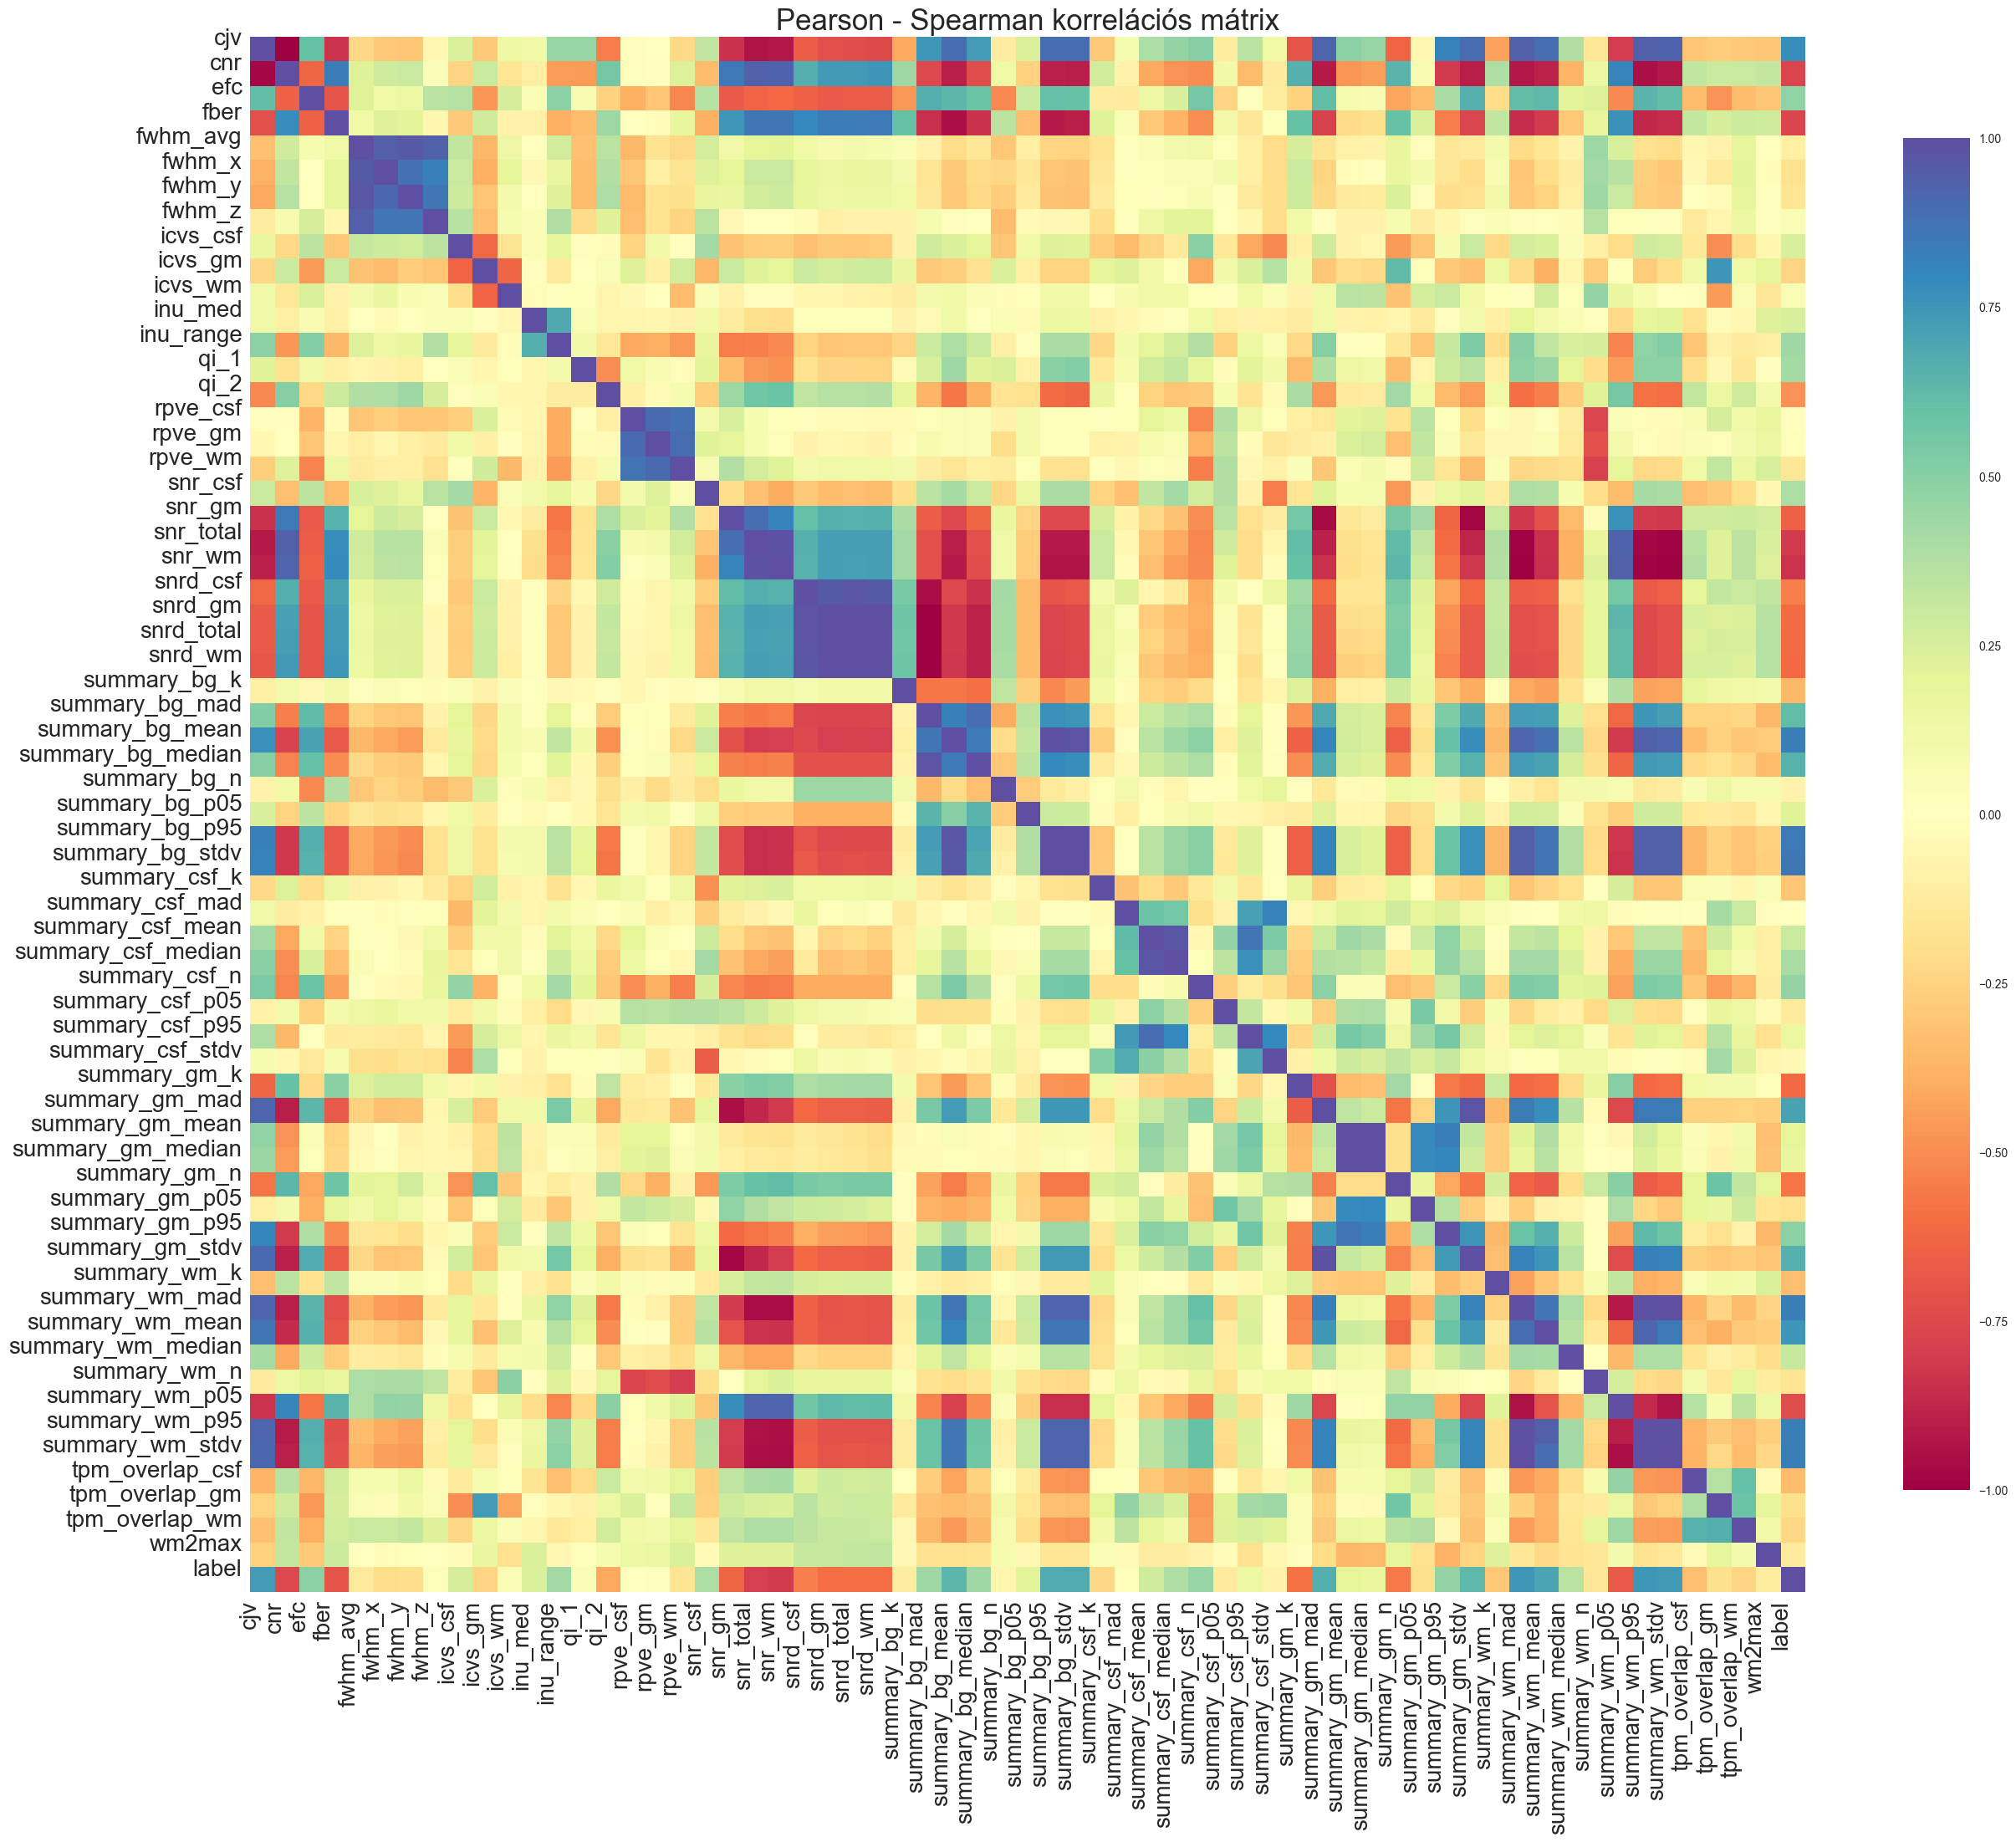

In [292]:
import matplotlib
cols_y = scaled_df.columns

corr_p =  scaled_df.corr(method='pearson')
corr_s =  scaled_df.corr(method='spearman')
upper = np.triu(corr_s)
lower = np.tril(corr_p)
whole = upper + lower
cmap = sns.color_palette("Spectral", as_cmap=True)
plt.figure(figsize=(30,30))
sns.heatmap(whole, center=0, fmt='.2f', square=True, cbar_kws={'shrink': 0.7}, cmap = cmap,  vmin=-1, vmax=1)
plt.xticks(ticks=range(63), labels = cols_y, rotation = 90, fontsize=20)
plt.yticks(ticks=range(63), labels = cols_y, rotation = 0, fontsize=20)
plt.title('Pearson - Spearman korrelációs mátrix', fontsize=25)
plt.show()

#sns.heatmap( scaled_df.corr(method = 'spearman'),  square = True, fmt= '.2f',annot_kws={'size': 8}, cbar_kws={'shrink': 0.7})

In [247]:
df_1 = scaled_df[scaled_df['label'] == 1]
df_2 = scaled_df[scaled_df['label'] == 2]
df_3 = scaled_df[scaled_df['label'] == 3]

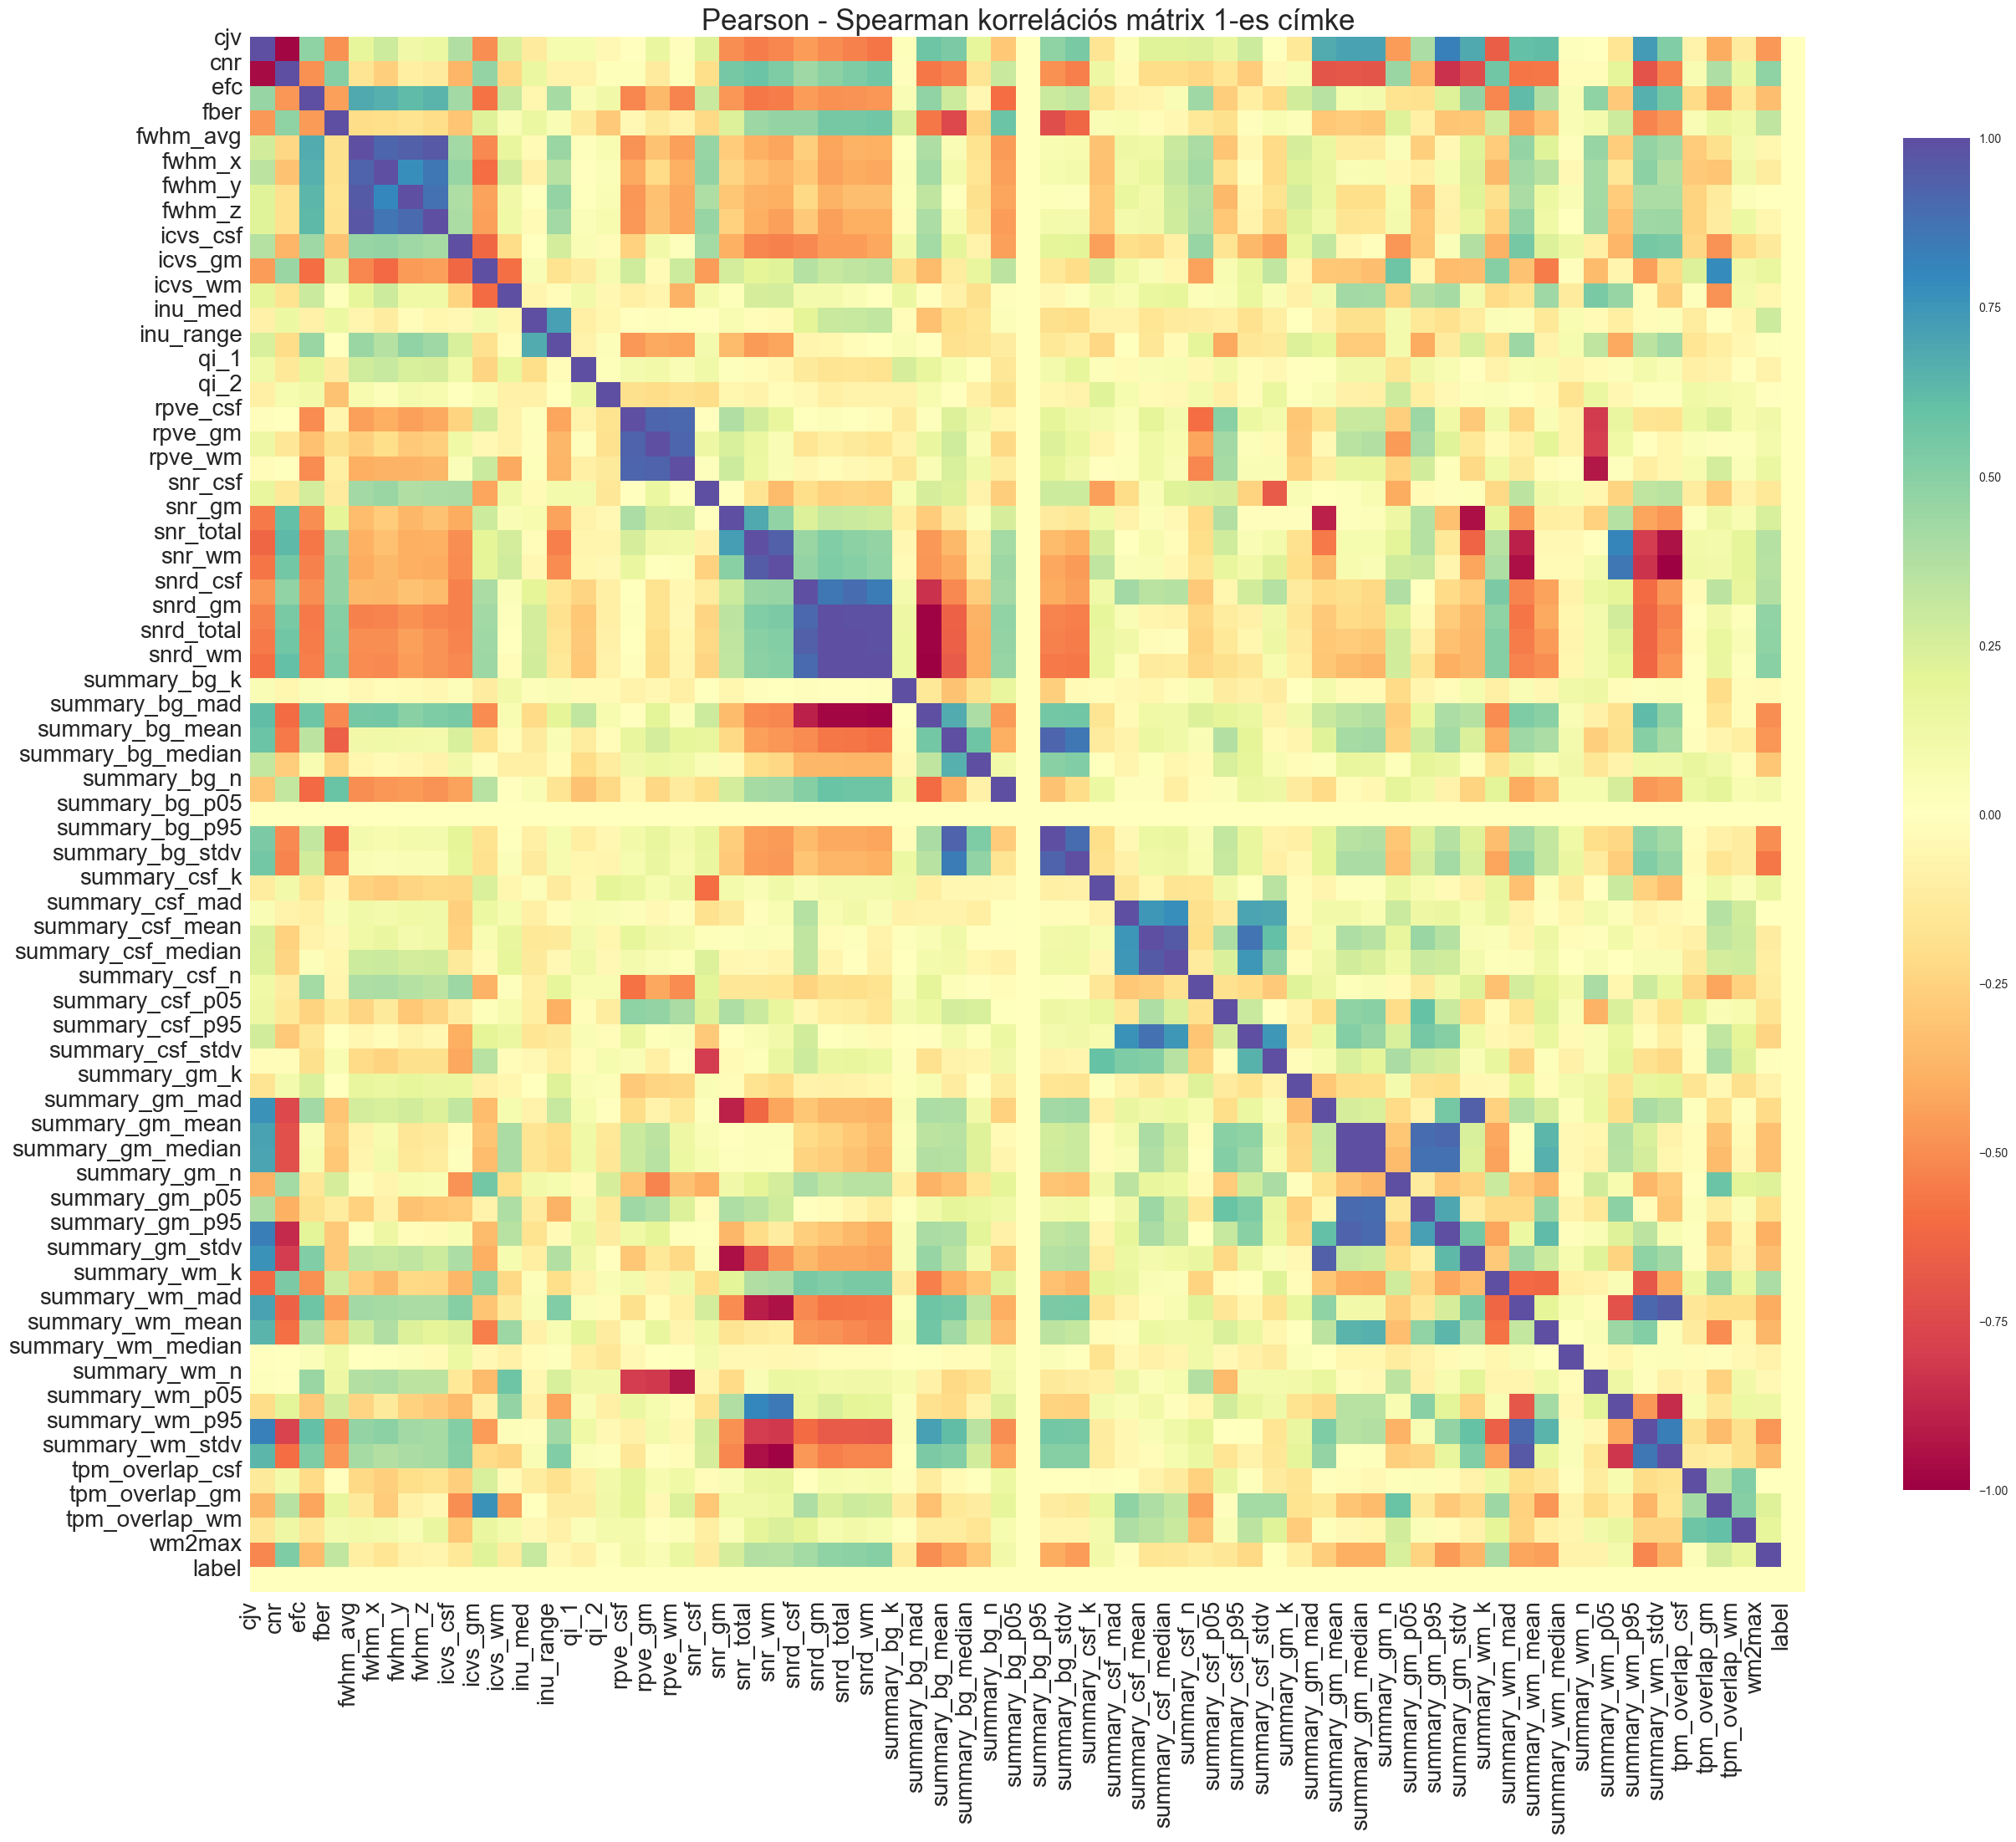

In [293]:
corr_p =  df_1.corr(method='pearson').fillna(0)
corr_s =  df_1.corr(method='spearman').fillna(0)
upper = np.triu(corr_s)
lower = np.tril(corr_p)
whole = upper + lower
cmap = sns.color_palette("Spectral", as_cmap=True)
plt.figure(figsize=(30,30))
sns.heatmap(whole, center=0, fmt='.2f', square=True, cbar_kws={'shrink': 0.7}, cmap = cmap,  vmin=-1, vmax=1)
plt.xticks(ticks=range(63), labels = cols_y, rotation = 90, fontsize=20)
plt.yticks(ticks=range(63), labels = cols_y, rotation = 0, fontsize = 20)
plt.title('Pearson - Spearman korrelációs mátrix 1-es címke', fontsize=25)
plt.show()

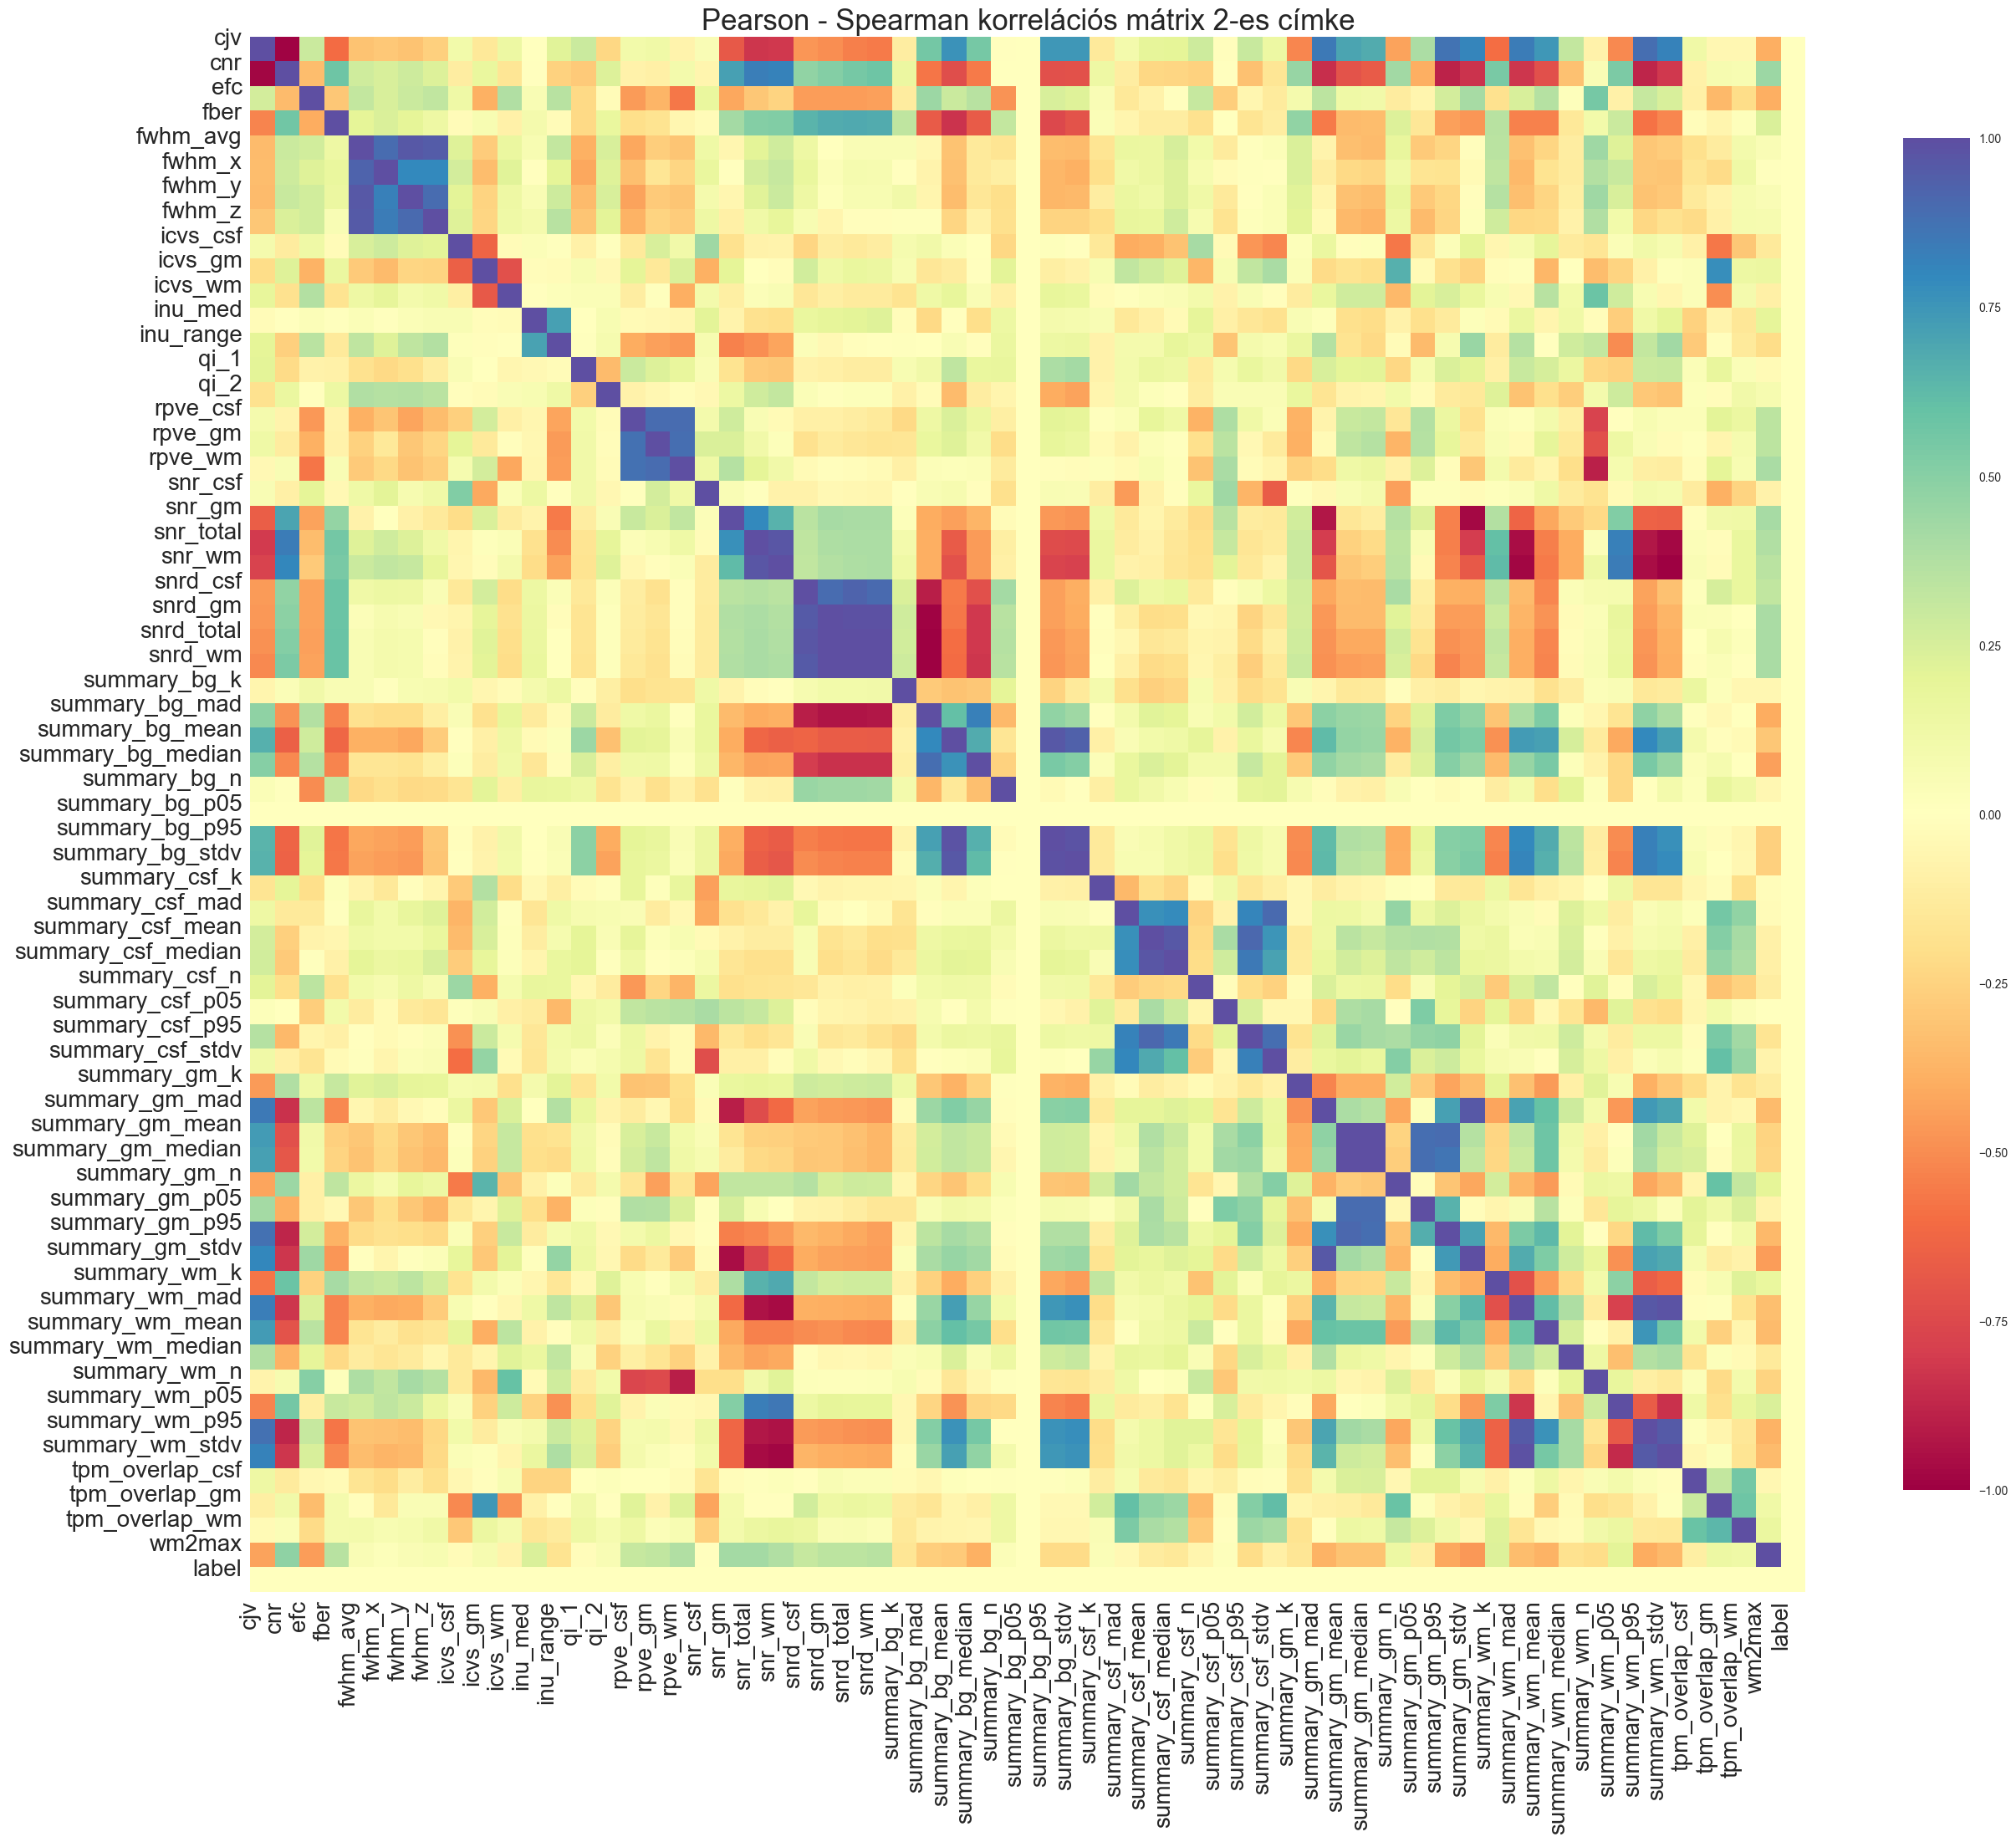

In [294]:
corr_p =  df_2.corr(method='pearson').fillna(0)
corr_s =  df_2.corr(method='spearman').fillna(0)
upper = np.triu(corr_s)
lower = np.tril(corr_p)
whole = upper + lower
plt.figure(figsize=(30,30))
sns.heatmap(whole, center=0, fmt='.2f', square=True, cbar_kws={'shrink': 0.7}, cmap = cmap,  vmin=-1, vmax=1)
plt.xticks(ticks=range(63), labels = cols_y, rotation = 90, fontsize=20)
plt.yticks(ticks=range(63), labels = cols_y, rotation = 0, fontsize=20)
plt.title('Pearson - Spearman korrelációs mátrix 2-es címke', fontsize=25)
plt.show()

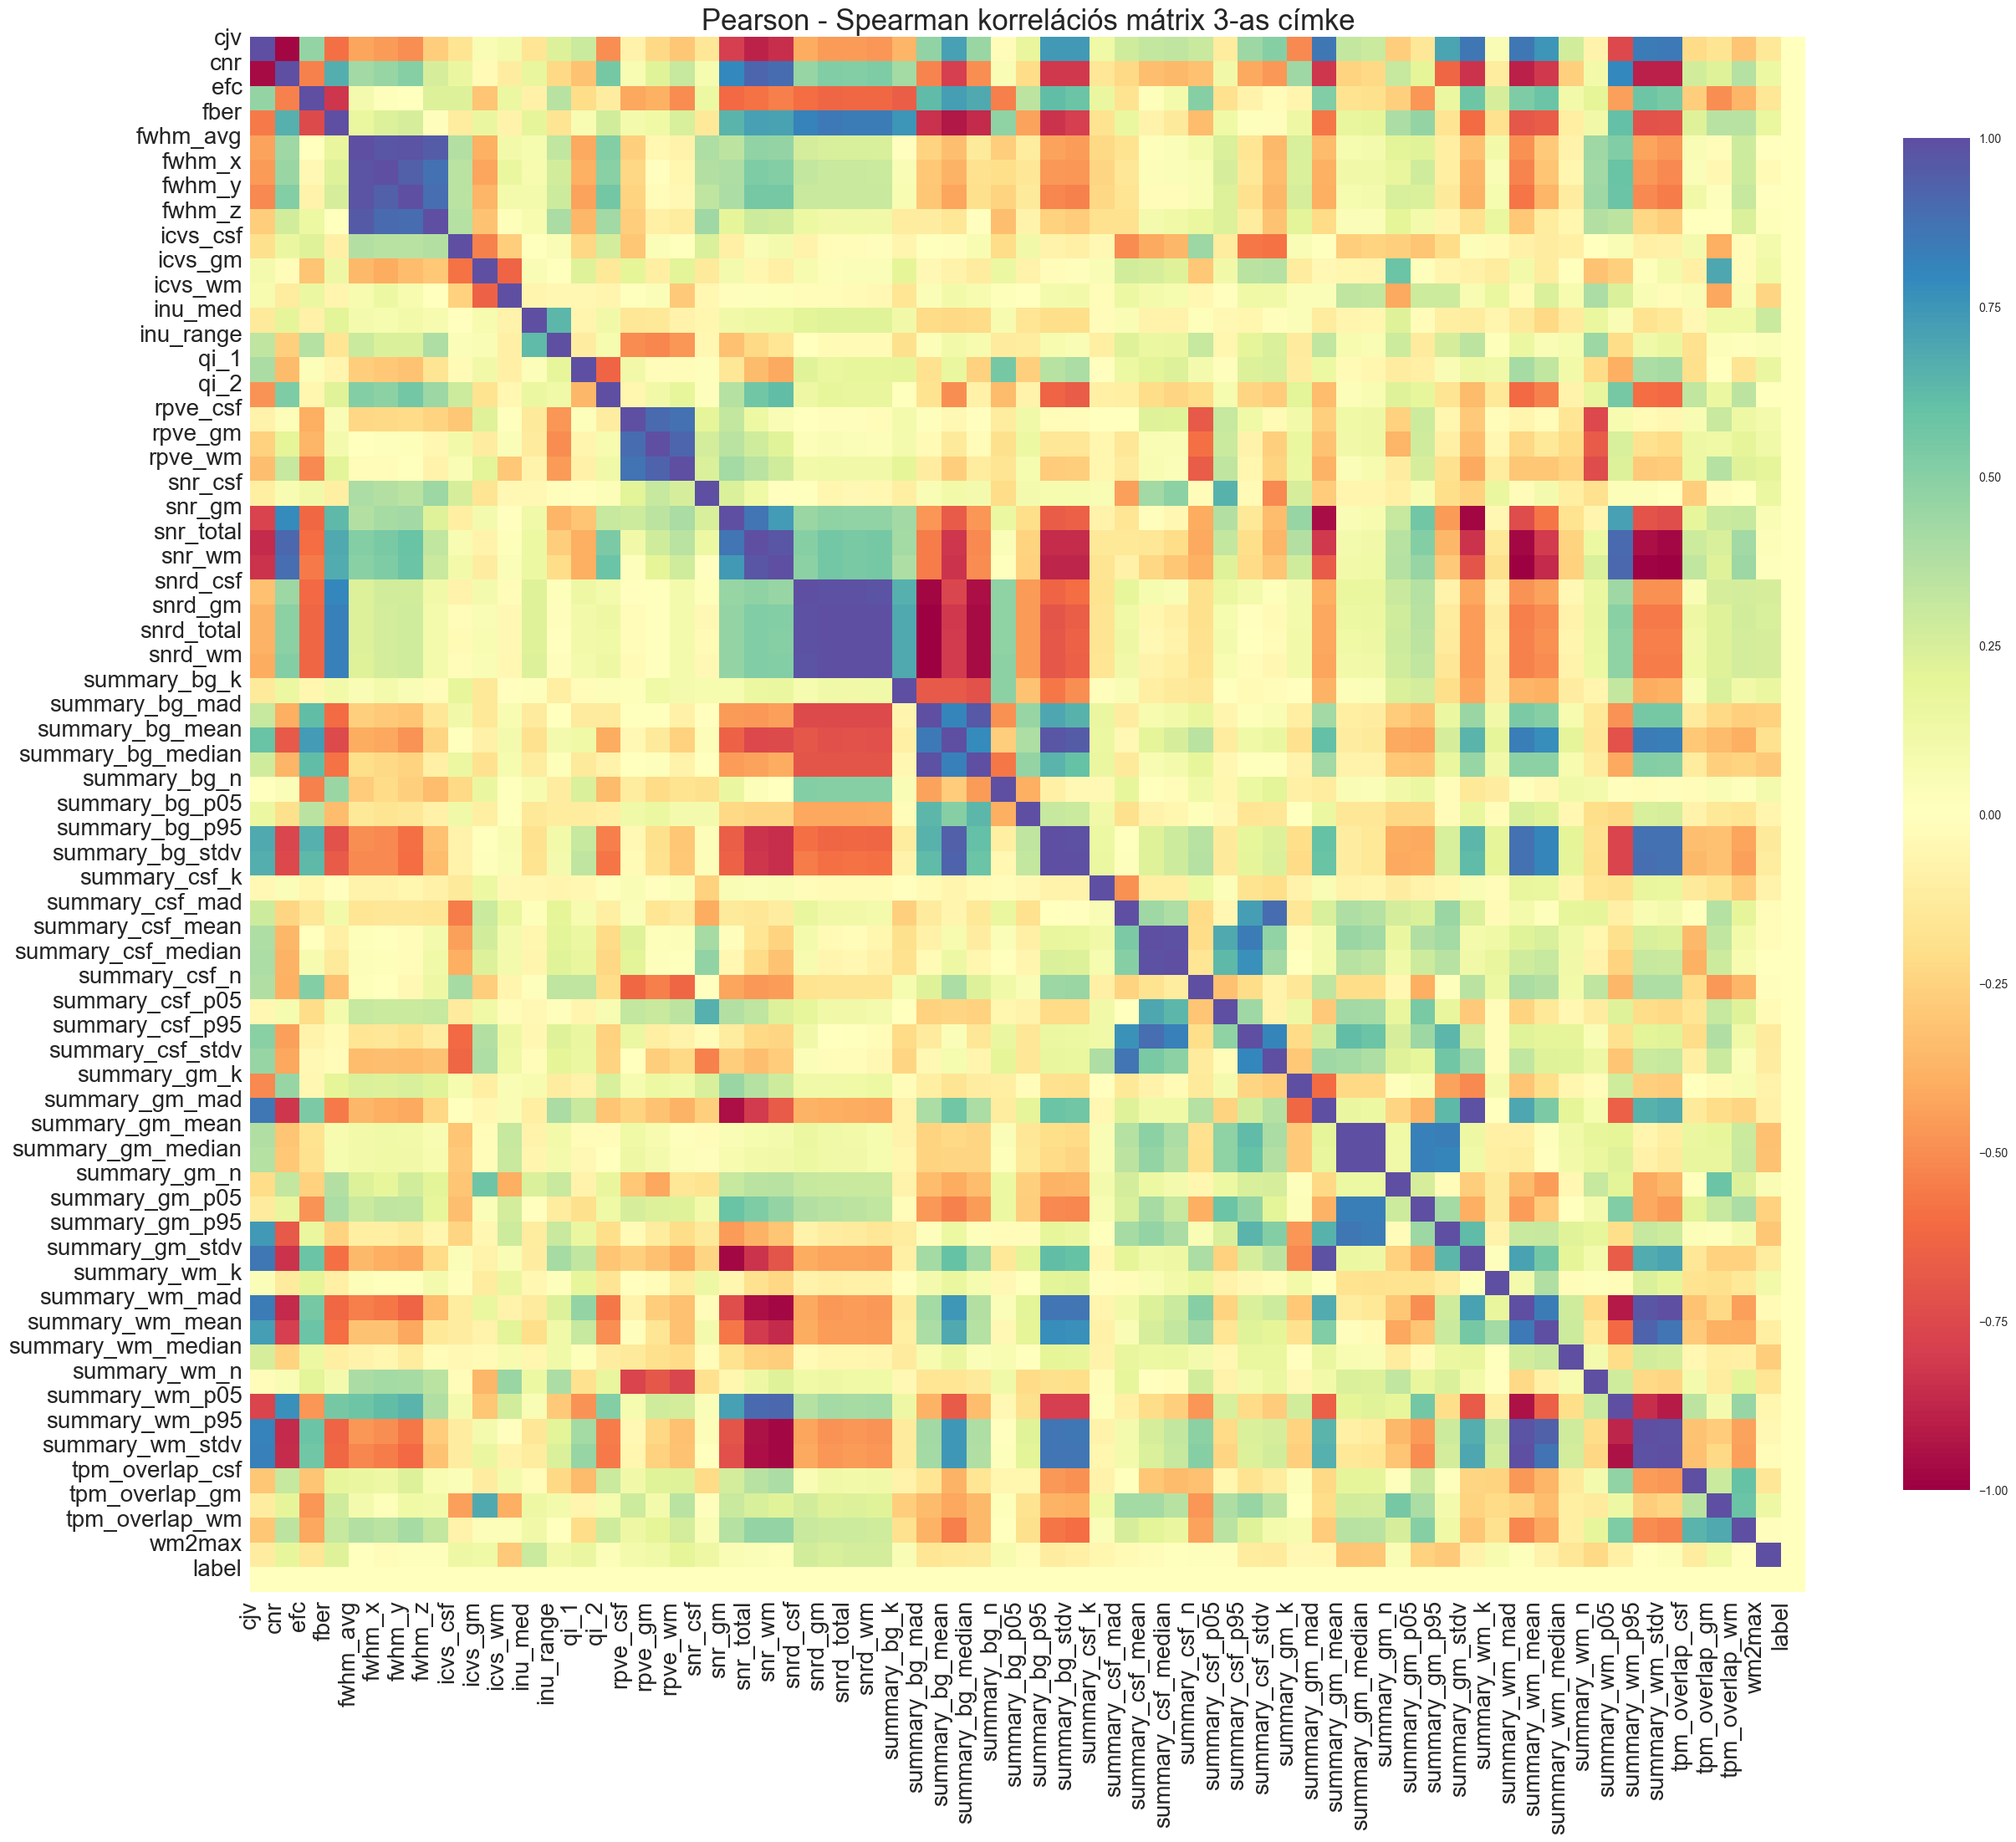

In [295]:
corr_p =  df_3.corr(method='pearson').fillna(0)
corr_s =  df_3.corr(method='spearman').fillna(0)
upper = np.triu(corr_s)
lower = np.tril(corr_p)
whole = upper + lower
plt.figure(figsize=(30,30))
sns.heatmap(whole, center=0, fmt='.2f', square=True, cbar_kws={'shrink': 0.7}, cmap = cmap,  vmin=-1, vmax=1)
plt.xticks(ticks=range(63), labels = cols_y, rotation = 90, fontsize=20)
plt.yticks(ticks=range(63), labels = cols_y, rotation = 0, fontsize=20)
plt.title('Pearson - Spearman korrelációs mátrix 3-as címke', fontsize=25)
plt.show()

In [83]:
#plt.figure(figsize=(50,30))
#sns.heatmap(scaled_df.corr(method='kendall'),  square = True, fmt= '.2f',annot_kws={'size': 8})

Observations: 
pearson max value: fber, min_value: fwhm_avg
spearman max value: fber, min_value: fwhm_avg
kendall max value: summary_wm_k, min_value: summary_bg_stdv

In [84]:
cols=df.columns
cols_2=column_names

In [85]:
from scipy.stats import shapiro
stat,p = shapiro(df_features_drop)
if p < 0.05:
    
    print('does not have normal distribution')
else:
    print('stat=%.3f, p=%.3f\n' % (stat,p))
    print('does have normal distribution')

does not have normal distribution


c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [86]:
import statsmodels.api as sm
import pylab as py
cols_drop = df_features_drop.columns
for col in cols_drop:
    stat,p = shapiro(df_features_drop[col])
    if p < 0.05:
        continue
            #print('stat=%.3f, p=%.5f\n' % (stat,p))
            #print(col +' does not have normal distribution')
    else:
        print('stat=%.3f, p=%.3f\n' % (stat,p))
        print(col + ' does have normal distribution')

stat=0.997, p=0.600

icvs_csf does have normal distribution
stat=0.995, p=0.124

icvs_wm does have normal distribution
stat=0.993, p=0.056

rpve_wm does have normal distribution
stat=0.995, p=0.120

summary_csf_mean does have normal distribution
stat=0.994, p=0.088

summary_gm_mean does have normal distribution
stat=0.993, p=0.051

summary_gm_median does have normal distribution
stat=0.994, p=0.058

wm2max does have normal distribution


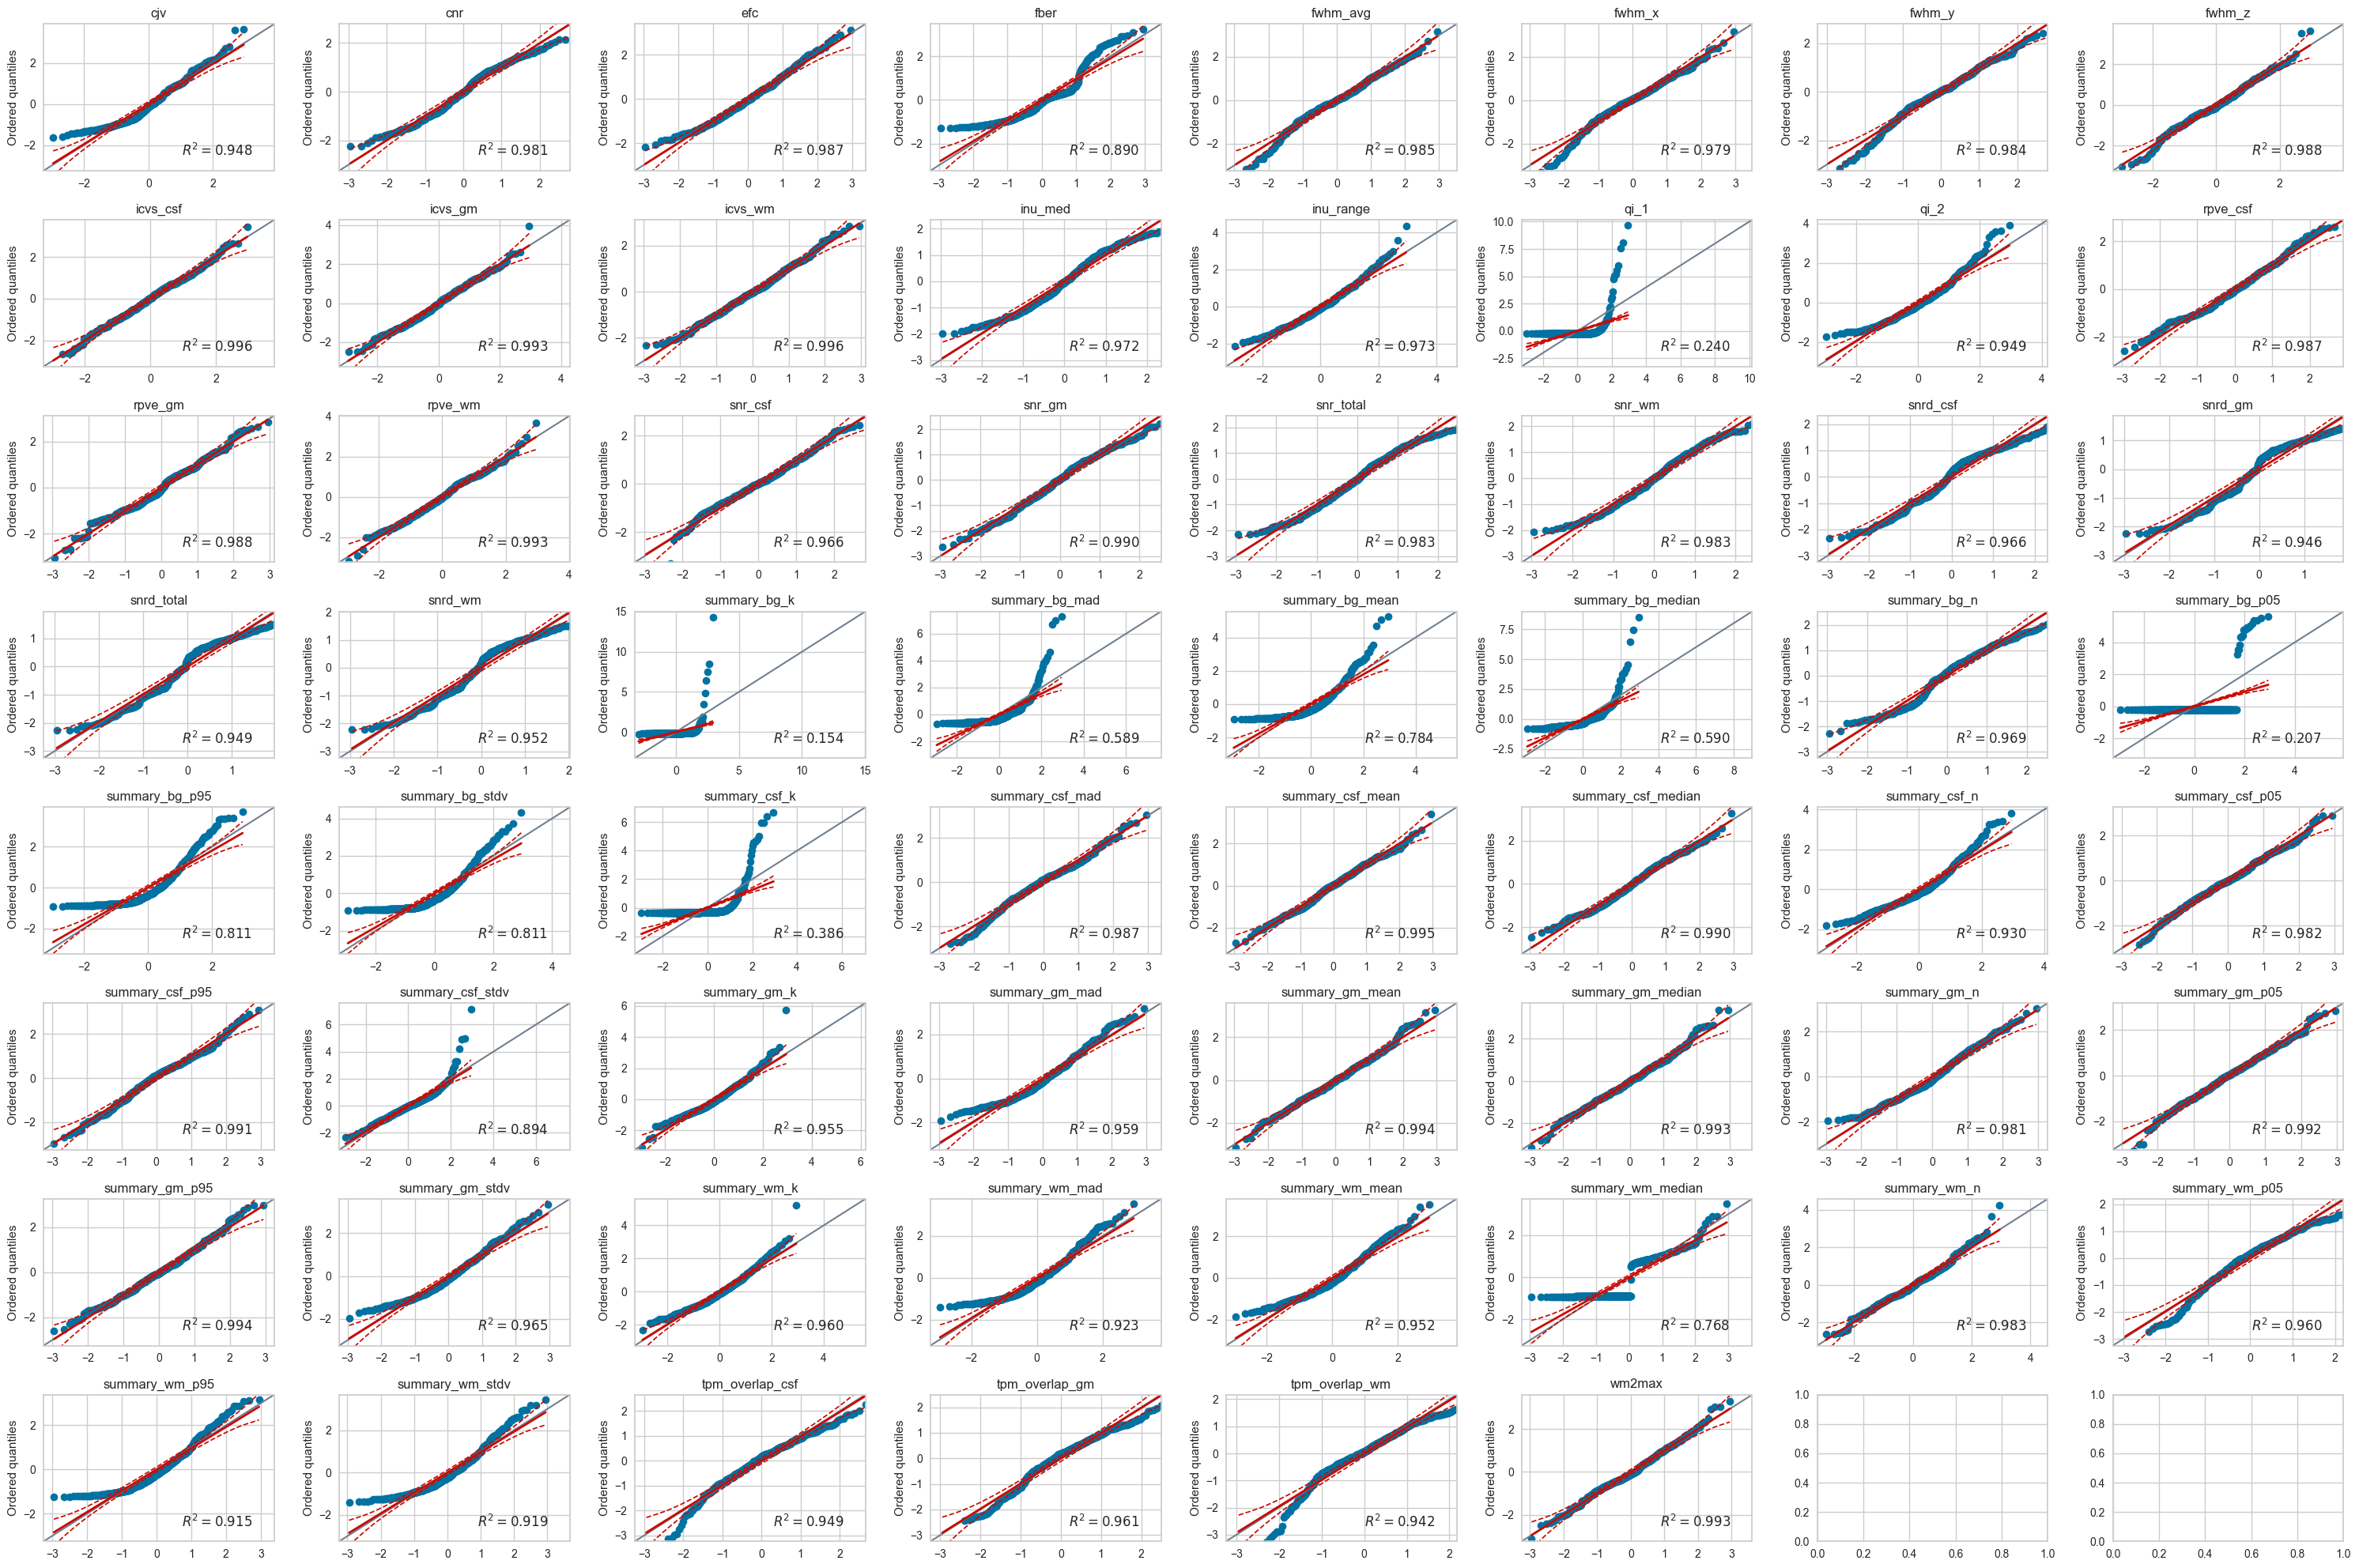

In [318]:
import pingouin as pg

cols_drop = df_features_drop.columns
fig, axs = plt.subplots(8, 8, figsize=(30, 20))
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(cols_drop):
    # Calculate the subplot position
    row = n // 8
    cols = n % 8

    # Filter df and plot QQ plot on the subplot axis
    ax = axs[row, cols]
    pg.qqplot(df_features_drop[col], dist='norm', confidence=0.95, ax=ax)

    # Chart formatting
    ax.set_title(col)
    ax.set_xlabel("")

# Remove empty subplots if the number of columns is not a perfect square
#if len(cols_drop) < 64:
#    for n in range(len(cols_drop), 64):
#        row = n // 8
#        col = n % 8
#        fig.delaxes(axs[row, cols])

plt.tight_layout()
plt.show()


In [319]:
'''import pingouin as pg

cols_drop = df_features_drop.columns
fig, axs = plt.subplots( figsize=(30, 20))
plt.subplots_adjust(hspace=0.5)
for n, col in enumerate(cols_drop):
    # add a new subplot iteratively
    ax = plt.subplot(8, 8, n + 1)

    # filter df and plot ticker on the new subplot axis
    pg.qqplot(df_features_drop[col],dist='norm', confidence = .95)

    # chart formatting
    ax.set_title(col)
    ax.set_xlabel("")
for col in cols_drop:
    pg.qqplot(df_features_drop[col],dist='norm', confidence = .95, ) #line=q -> line fits through the quantile
    plt.title(col)
    plt.xlim(-4,4)
plt.show()


stat,p = shapiro(df_features_drop[col])
    if p < 0.05:
        continue
        #print('stat=%.3f, p=%.5f\n' % (stat,p))
        #print(col +' does not have normal distribution')
    else:
        print('stat=%.3f, p=%.3f\n' % (stat,p))
        print(col + ' does have normal distribution')'''

'import pingouin as pg\n\ncols_drop = df_features_drop.columns\nfig, axs = plt.subplots( figsize=(30, 20))\nplt.subplots_adjust(hspace=0.5)\nfor n, col in enumerate(cols_drop):\n    # add a new subplot iteratively\n    ax = plt.subplot(8, 8, n + 1)\n\n    # filter df and plot ticker on the new subplot axis\n    pg.qqplot(df_features_drop[col],dist=\'norm\', confidence = .95)\n\n    # chart formatting\n    ax.set_title(col)\n    ax.set_xlabel("")\nfor col in cols_drop:\n    pg.qqplot(df_features_drop[col],dist=\'norm\', confidence = .95, ) #line=q -> line fits through the quantile\n    plt.title(col)\n    plt.xlim(-4,4)\nplt.show()\n\n\nstat,p = shapiro(df_features_drop[col])\n    if p < 0.05:\n        continue\n        #print(\'stat=%.3f, p=%.5f\n\' % (stat,p))\n        #print(col +\' does not have normal distribution\')\n    else:\n        print(\'stat=%.3f, p=%.3f\n\' % (stat,p))\n        print(col + \' does have normal distribution\')'

In [88]:
stat,p = shapiro(df_features_drop)
print('stat=%.3f, p=%.3f\n' % (stat,p))
if p < 0.05:
    print('The df has normal distribution')
else:
    print('The df doesn\'t have normal distribution\n')

stat=0.973, p=0.000

The df has normal distribution


In [89]:
'''cols_drop = df_features_drop
for col in cols_drop:
    sns.displot(df_features_drop[col], kde=True)'''

'cols_drop = df_features_drop\nfor col in cols_drop:\n    sns.displot(df_features_drop[col], kde=True)'

In [90]:
%pip install graphviz

In [91]:
from sklearn import tree
import graphviz 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def plot_decision_tree(model, columns):
    dot_data = tree.export_graphviz(model, out_file=None, 
                             feature_names=columns,  
                             class_names=['Label_1','Label_2','Label_3'],  
                             filled=False, rounded=True,  
                             special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph 
  
    
def plot_importances_features(model, columns):
    indices = np.argsort(model.feature_importances_)[::-1]
    feat_imp = pd.DataFrame({'Feature':columns.values[indices],
                          'Feature ranking':model.feature_importances_[indices]})
    plt.rcParams['figure.figsize']=(8,30)
    sns.set_style('whitegrid')
    ax = sns.barplot(x='Feature ranking', y='Feature', data=feat_imp)
    #ax.title('Változók fontossági rangsora')
    for i in ax.containers:
      ax.bar_label(i,)
    ax.set(xlabel='Feature ranking')
    plt.show()

def plot_matrix(model_name, real_y_on_test, predicted_y):
  matrix = confusion_matrix(real_y_on_test, predicted_y)
  matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
  # Build the plot
  plt.figure(figsize=(10,8))
  sns.set(font_scale=1.4)
  sns.heatmap(matrix, annot=True, annot_kws={'size':10},
              cmap=plt.cm.Greens, linewidths=0.2)
  # Add labels to the plot
  class_names = ['Label_1','Label_2', 'Label_3']
  tick_marks = np.arange(len(class_names))
  tick_marks2 = tick_marks + 0.5
  plt.xticks(tick_marks, class_names, rotation=25)
  plt.yticks(tick_marks2, class_names, rotation=0)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.title('Confusion Matrix for ' + str(model_name) + ' Model')
  plt.show()


## What are the most important features

Decision Tree and Random Forest 

In [223]:
# data without outlier drop classification
df_features_drop = pd.DataFrame(df_features_drop)
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=8, criterion='gini', min_samples_split=10)  
clf1.fit(df_features_drop.values, y.values)
plot_decision_tree(clf1,column_names)   

AttributeError: 'numpy.ndarray' object has no attribute 'values'

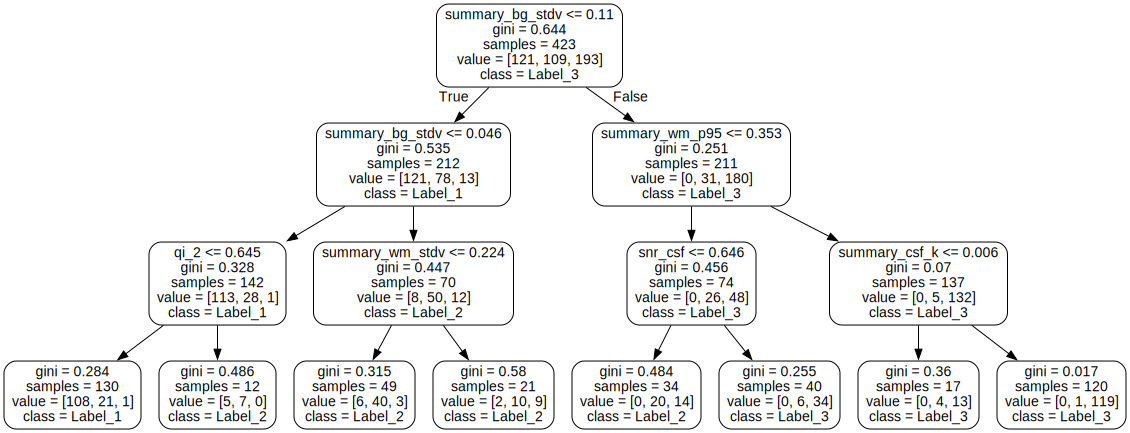

In [225]:
#outlier dropped data for classification

clf2 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=8, criterion='gini', min_samples_split=10)  
clf2.fit(df_features_clean.values, df_y.values)
plot_decision_tree(clf2,cols_2)

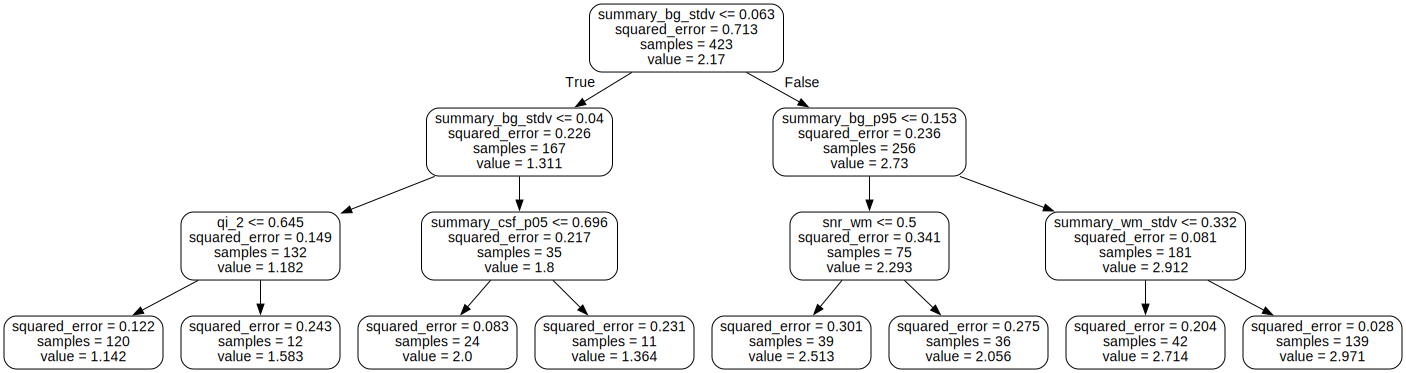

In [224]:
#outlier dropped data for regression on outlier dropped data

from sklearn.tree import DecisionTreeRegressor
clf_r = DecisionTreeRegressor(min_samples_leaf=8, max_depth=3)  
clf_r.fit(df_features_clean.values, df_y.values)
plot_decision_tree(clf_r,column_names)

In [215]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC



#train-test
X_clean = df_features_drop
y_clean = df['label']
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, random_state=42, test_size=0.2)

#models for the loop
models = []
models.append(('DT', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', LinearSVC(random_state=42)))
models.append(('GB', GradientBoostingClassifier(random_state=42)))

#cross-val scores for all models
results = dict()
names = []
for name, model in models:
      kfold = StratifiedKFold(n_splits=10)
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
      results[name]=(cv_results.mean(), cv_results.std())
      names.append(name)

print()
print('name   results.mean   results.std')
for key,value in results.items():
      print(key, value)

[('DT', DecisionTreeClassifier(random_state=42)), ('RF', RandomForestClassifier(random_state=42)), ('SVM', LinearSVC(random_state=42)), ('GB', GradientBoostingClassifier(random_state=42)), ('MLP', MLPClassifier(random_state=42))]


c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 


name   results.mean   results.std
DT (0.7184873949579832, 0.05019557822880028)
RF (0.8047899159663865, 0.05773304951852589)
SVM (0.7442857142857143, 0.042980626191445506)
GB (0.7905882352941176, 0.05488469402062332)
MLP (0.7844537815126051, 0.038974297089589306)


c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

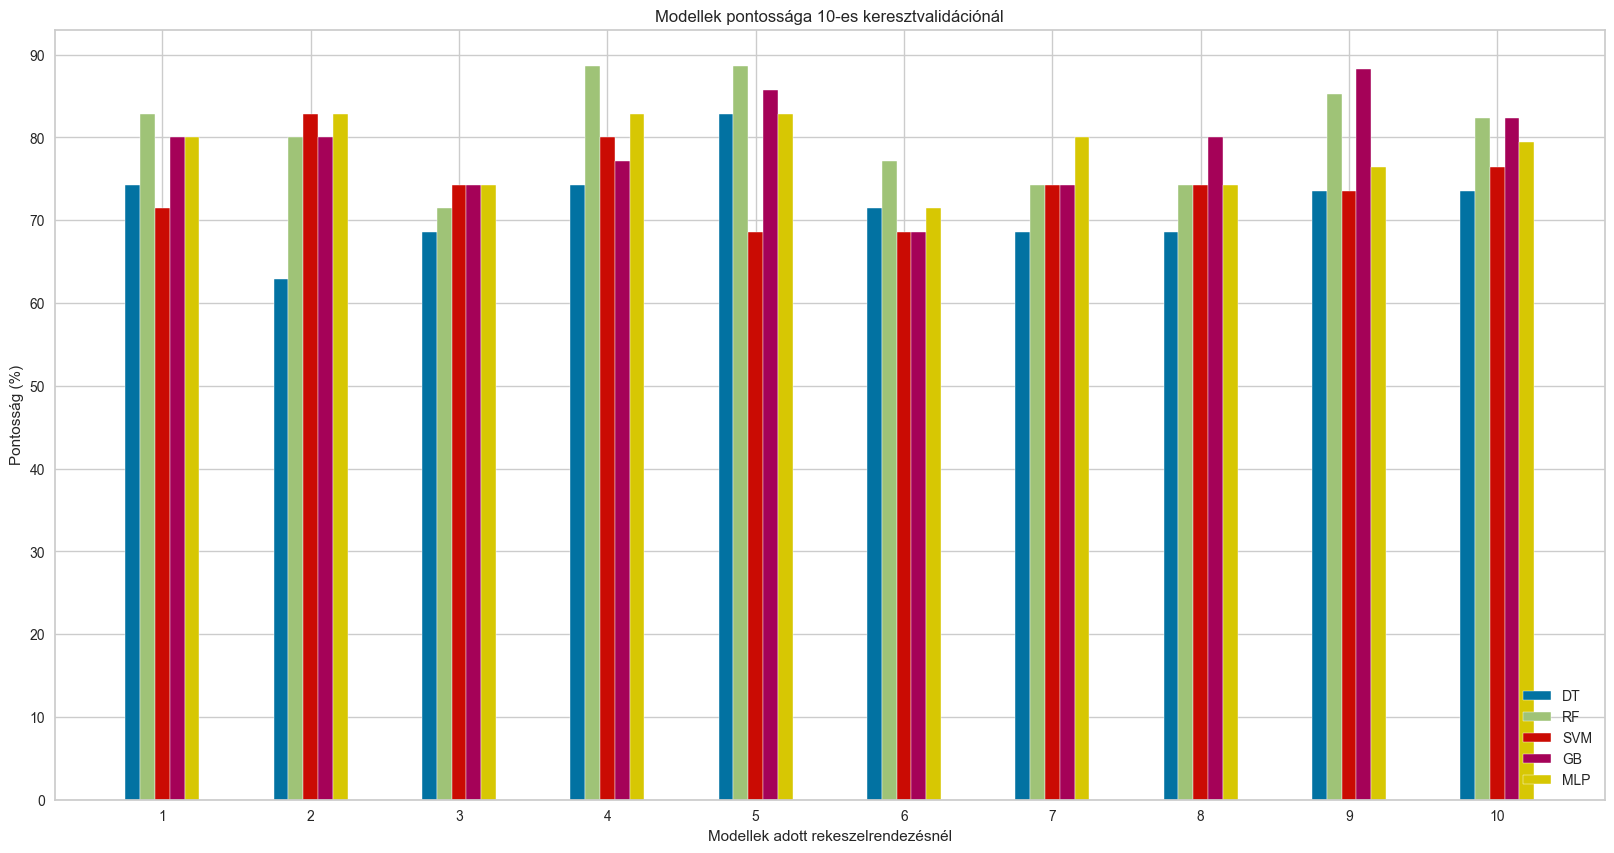

In [216]:
import matplotlib.pyplot as plt
import numpy as np

# ...

# cross-val scores for all models
results = {}
names = []
fig, ax = plt.subplots(figsize=(20, 10))

# Initialize the x-axis positions for each group
x = np.arange(1, 11)
bar_width = 0.1

# Iterate over the models
for i, (name, model) in enumerate(models):
    kfold = StratifiedKFold(n_splits=10, )
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results[name] = (cv_results.mean(), cv_results.std())
    names.append(name)

    # Plotting the accuracy scores for each fold as grouped bars
    ax.bar(x + i * bar_width, cv_results, width=bar_width, label=name)


# Customize the plot
ax.set_xlabel('Modellek adott rekeszelrendezésnél')
ax.set_yticks(np.arange(0, 1, 0.1))
ax.set_yticklabels(np.arange(0, 100, 10))
ax.set_ylabel('Pontosság (%)')
ax.grid(True)
ax.set_title('Modellek pontossága 10-es keresztvalidációnál')
ax.set_xticks(x + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels([str(i) for i in range(1, 11)])
ax.legend(loc='lower right')

plt.show()



In [96]:
feature_importances_df = pd.DataFrame(index=cols_2)

In [97]:
#random forest classification on data with outlier accuracy
'''forest = RandomForestClassifier(n_estimators=1000, bootstrap=False, criterion='entropy', min_samples_split=10, random_state=42)
forest.fit(X_train, y_train)
y_pred_test = forest.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_absolute_error(y_test, y_pred_test))
print("The Mean Absolute Error of our Model is {}".format(round(mae, 2)))
print("The Root of Mean Absolute Error of our Model is {}".format(round(rmse, 2)))
print("The accuracy o the modle is: {}".format(round(accuracy_score(y_test, y_pred_test),2)))
plot_matrix('RandomForestClassifier', y_test, y_pred_test)
classification_report(y_test, y_pred_test)'''

'forest = RandomForestClassifier(n_estimators=1000, bootstrap=False, criterion=\'entropy\', min_samples_split=10, random_state=42)\nforest.fit(X_train, y_train)\ny_pred_test = forest.predict(X_test)\n\nmae = mean_absolute_error(y_test, y_pred_test)\nrmse = np.sqrt(mean_absolute_error(y_test, y_pred_test))\nprint("The Mean Absolute Error of our Model is {}".format(round(mae, 2)))\nprint("The Root of Mean Absolute Error of our Model is {}".format(round(rmse, 2)))\nprint("The accuracy o the modle is: {}".format(round(accuracy_score(y_test, y_pred_test),2)))\nplot_matrix(\'RandomForestClassifier\', y_test, y_pred_test)\nclassification_report(y_test, y_pred_test)'

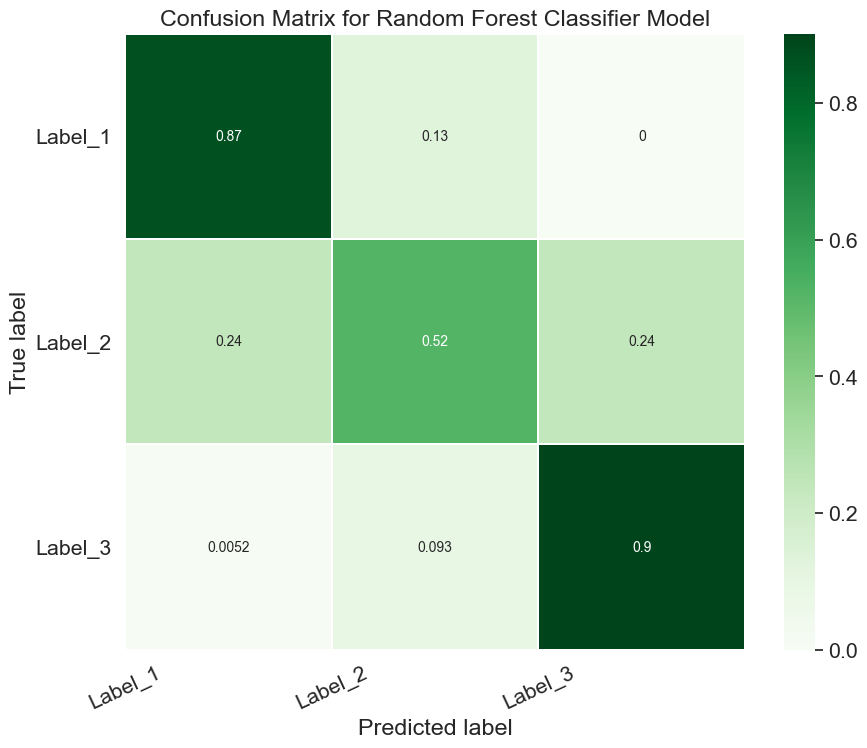

Accuracy score:  0.7943262411347518
              precision    recall  f1-score   support

           1       0.80      0.87      0.83       121
           2       0.63      0.52      0.57       109
           3       0.87      0.90      0.89       193

    accuracy                           0.79       423
   macro avg       0.76      0.76      0.76       423
weighted avg       0.79      0.79      0.79       423



In [98]:

from sklearn.model_selection import cross_validate

forest = RandomForestClassifier(n_estimators=1000, bootstrap=False, criterion='entropy', min_samples_split=10, random_state=42)
forest_crossvalp =cross_val_predict(forest, X_clean,y_clean, cv=kfold)
plot_matrix('Random Forest Classifier',  y_clean, forest_crossvalp)
print('Accuracy score: ', accuracy_score(forest_crossvalp, y_clean))
print(classification_report(y_clean, forest_crossvalp))
output = cross_validate(forest, X_clean, y_clean, cv=10, scoring = 'accuracy', return_estimator =True)
for idx,estimator in enumerate(output['estimator']):
    #print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = cols_2,
                                        columns=['importance'])  #.sort_values('importance', ascending=False)
#feature_importances_df['RandomForestClassifier'] = feature_importances['importance']

In [99]:
from sklearn.metrics import auc, roc_curve
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = forest.predict_proba(X_clean.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y_clean.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [100]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc


def evaluate_classifier(x, y, scoring_metric, classifier_model, kfold_cv):
    """
    Evaluate the performance of a classifier model using cross-validation.

    Parameters:
        x (pd.DataFrame): Feature matrix.
        y (pd.Series): Target variable.
        scoring_metric (str): Scoring metric to use for cross-validation.
        classifier_model: Classifier model to evaluate.
        kfold_cv: Cross-validation strategy.

    Returns:
        Tuple containing the list of column names for x, the mean score, sensitivity, specificity, ROC AUC score, and the classifier_model object.
    """
    # Generate cross-validated predictions
    predicted_y = cross_val_predict(classifier_model, x, y, cv=kfold_cv)

    # Compute confusion matrix and print it
    conf_matrix = confusion_matrix(y, predicted_y)
   # conf_matrix_labels = pd.DataFrame(conf_matrix, columns=[
    #                                  "Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
    print("Confusion matrix: ")
    print(conf_matrix)
    print("\n")

    # Compute cross-validated scores and ROC AUC score
    scores = cross_val_score(classifier_model, x, y,
                             cv=kfold_cv, scoring=scoring_metric)
    roc_auc = cross_val_score(classifier_model, x, y,
                              cv=kfold_cv, scoring="roc_auc")


    # Print results and plot ROC curve
    print("Mean score is: ", scores.mean())
    print("ROC AUC score is: ", roc_auc.mean())
    print(scores)

    results_dict = {
        "Features": x.columns.to_list(),
        "Accuracy": scores.mean(),
        "ROC AUC": roc_auc.mean(),
        "Classifier": str(classifier_model)
    }

    df_results = pd.DataFrame.from_dict(results_dict)
    print('choosen features: ', x.columns.to_list())

    # Saving the results to a csv file
    #df_results.to_csv(output_path, index=False)

    # Return results and classifier object
    return x.columns.to_list(), scores.mean(), roc_auc.mean(), classifier_model

In [101]:
evaluate_classifier(X_clean, y_clean, "accuracy", forest, kfold)

Confusion matrix: 
[[105  16   0]
 [ 26  57  26]
 [  1  18 174]]




c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\metrics\_scorer.py", line 107, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\s

Mean score is:  0.7940199335548173
ROC AUC score is:  nan
[0.86046512 0.79069767 0.86046512 0.76190476 0.76190476 0.73809524
 0.69047619 0.80952381 0.80952381 0.85714286]
choosen features:  ['cjv', 'cnr', 'efc', 'fber', 'fwhm_avg', 'fwhm_x', 'fwhm_y', 'fwhm_z', 'icvs_csf', 'icvs_gm', 'icvs_wm', 'inu_med', 'inu_range', 'qi_1', 'qi_2', 'rpve_csf', 'rpve_gm', 'rpve_wm', 'snr_csf', 'snr_gm', 'snr_total', 'snr_wm', 'snrd_csf', 'snrd_gm', 'snrd_total', 'snrd_wm', 'summary_bg_k', 'summary_bg_mad', 'summary_bg_mean', 'summary_bg_median', 'summary_bg_n', 'summary_bg_p05', 'summary_bg_p95', 'summary_bg_stdv', 'summary_csf_k', 'summary_csf_mad', 'summary_csf_mean', 'summary_csf_median', 'summary_csf_n', 'summary_csf_p05', 'summary_csf_p95', 'summary_csf_stdv', 'summary_gm_k', 'summary_gm_mad', 'summary_gm_mean', 'summary_gm_median', 'summary_gm_n', 'summary_gm_p05', 'summary_gm_p95', 'summary_gm_stdv', 'summary_wm_k', 'summary_wm_mad', 'summary_wm_mean', 'summary_wm_median', 'summary_wm_n', 'summ

c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\metrics\_scorer.py", line 107, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


(['cjv',
  'cnr',
  'efc',
  'fber',
  'fwhm_avg',
  'fwhm_x',
  'fwhm_y',
  'fwhm_z',
  'icvs_csf',
  'icvs_gm',
  'icvs_wm',
  'inu_med',
  'inu_range',
  'qi_1',
  'qi_2',
  'rpve_csf',
  'rpve_gm',
  'rpve_wm',
  'snr_csf',
  'snr_gm',
  'snr_total',
  'snr_wm',
  'snrd_csf',
  'snrd_gm',
  'snrd_total',
  'snrd_wm',
  'summary_bg_k',
  'summary_bg_mad',
  'summary_bg_mean',
  'summary_bg_median',
  'summary_bg_n',
  'summary_bg_p05',
  'summary_bg_p95',
  'summary_bg_stdv',
  'summary_csf_k',
  'summary_csf_mad',
  'summary_csf_mean',
  'summary_csf_median',
  'summary_csf_n',
  'summary_csf_p05',
  'summary_csf_p95',
  'summary_csf_stdv',
  'summary_gm_k',
  'summary_gm_mad',
  'summary_gm_mean',
  'summary_gm_median',
  'summary_gm_n',
  'summary_gm_p05',
  'summary_gm_p95',
  'summary_gm_stdv',
  'summary_wm_k',
  'summary_wm_mad',
  'summary_wm_mean',
  'summary_wm_median',
  'summary_wm_n',
  'summary_wm_p05',
  'summary_wm_p95',
  'summary_wm_stdv',
  'tpm_overlap_csf',
  't

In [102]:
#gridsearchön belül cv helye

#modell futtatása a best_params_ értékekkel

#for ciklus az összes modellre?

In [103]:
#random forest classification on data without outlier accuracy

'''X_clean = scaled_df[scaled_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 6).all(axis=1)]
y_clean = X_clean[X_clean.columns[62]]
X_clean = X_clean[X_clean.columns[0:62]]
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, random_state=42, test_size=0.2, stratify=y_clean)
forest_clean = RandomForestClassifier(n_estimators=1000, bootstrap=False, criterion='entropy', min_samples_split=10, random_state=42)
forest_clean.fit(X_train, y_train)
y_pred_test_clean = forest_clean.predict(X_test)
accuracy_score(y_test, y_pred_test_clean)
plot_matrix('RandomForestClassifier', y_test, y_pred_test_clean)'''

"X_clean = scaled_df[scaled_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 6).all(axis=1)]\ny_clean = X_clean[X_clean.columns[62]]\nX_clean = X_clean[X_clean.columns[0:62]]\nX_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, random_state=42, test_size=0.2, stratify=y_clean)\nforest_clean = RandomForestClassifier(n_estimators=1000, bootstrap=False, criterion='entropy', min_samples_split=10, random_state=42)\nforest_clean.fit(X_train, y_train)\ny_pred_test_clean = forest_clean.predict(X_test)\naccuracy_score(y_test, y_pred_test_clean)\nplot_matrix('RandomForestClassifier', y_test, y_pred_test_clean)"

              precision    recall  f1-score   support

           1       0.81      0.76      0.79        29
           2       0.50      0.73      0.59        22
           3       0.97      0.76      0.85        37

    accuracy                           0.75        88
   macro avg       0.76      0.75      0.74        88
weighted avg       0.80      0.75      0.76        88



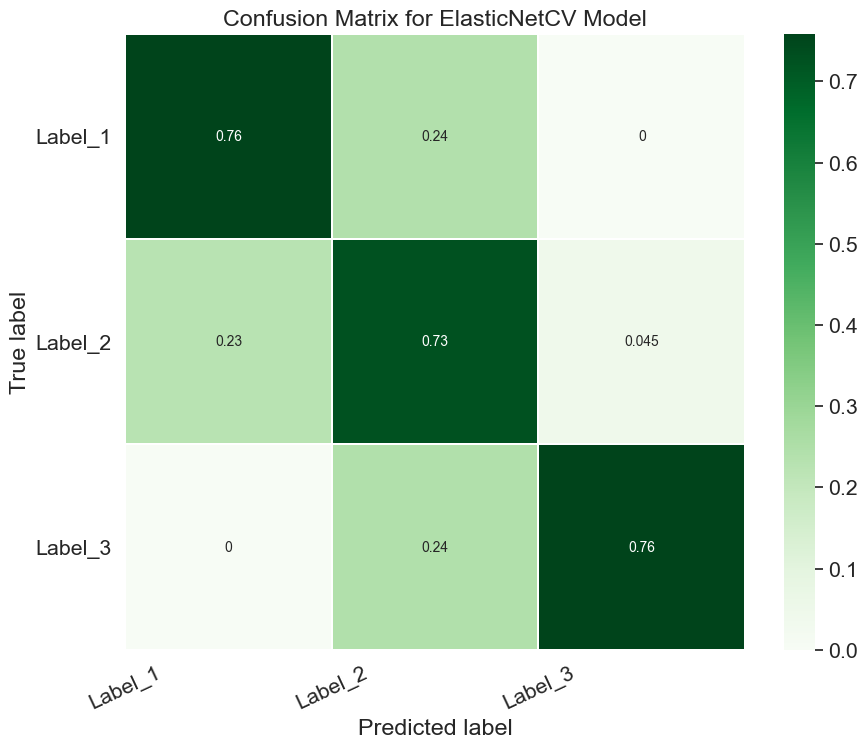

In [176]:

elastic_best = ElasticNetCV(eps= 0.05, l1_ratio=0.5, cv=10)
elastic_best.fit(X_train, y_train)
result = elastic_best.predict(X_test)
result_int = np.round(result, 0)
print(classification_report(y_test, result_int))
plot_matrix('ElasticNetCV', y_test, result_int)
#print(result)


c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.780e-02, tolerance: 2.267e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.483e-02, tolerance: 2.294e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

Text(0, 0.5, 'rmse')

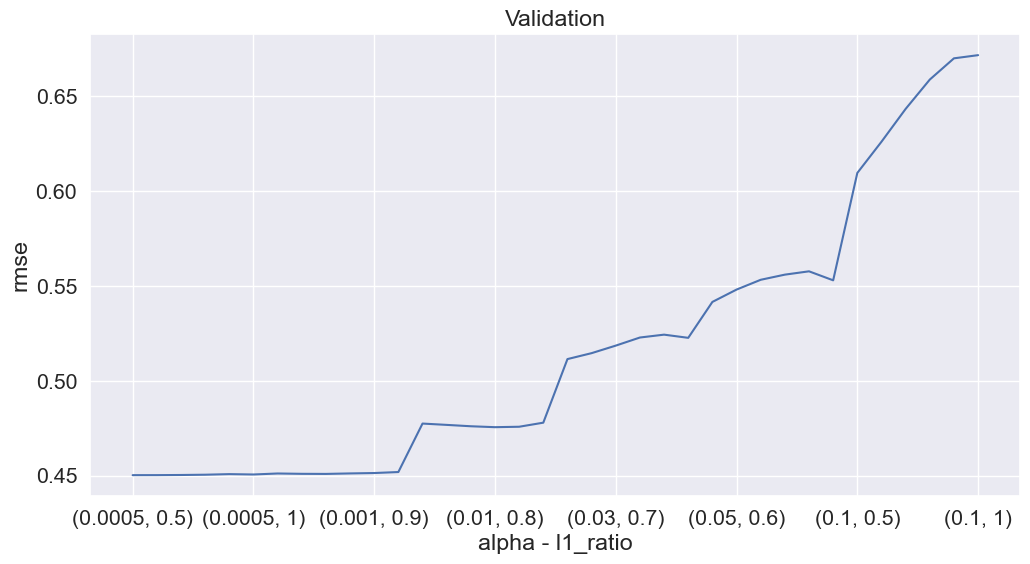

In [177]:
from itertools import product
from matplotlib import rcParams
from sklearn.linear_model import ElasticNet

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)
alphas = [0.0005, 0.001, 0.01, 0.03, 0.05, 0.1]
l1_ratios = [0.5, 0.6, 0.7, 0.8, 0.9, 1 ]
cv_elastic = [rmse_cv(ElasticNet(alpha = alpha, l1_ratio=l1_ratio)).mean() 
            for (alpha, l1_ratio) in product(alphas, l1_ratios)]
rcParams['figure.figsize'] = (12.0, 6.0)
idx = list(product(alphas, l1_ratios))
p_cv_elastic = pd.Series(cv_elastic, index = idx)
p_cv_elastic.plot(title = "Validation")
plt.xlabel("alpha - l1_ratio")
plt.ylabel("rmse")

c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.167e-02, tolerance: 2.267e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.565e-02, tolerance: 2.273e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

Text(0, 0.5, 'rmse')

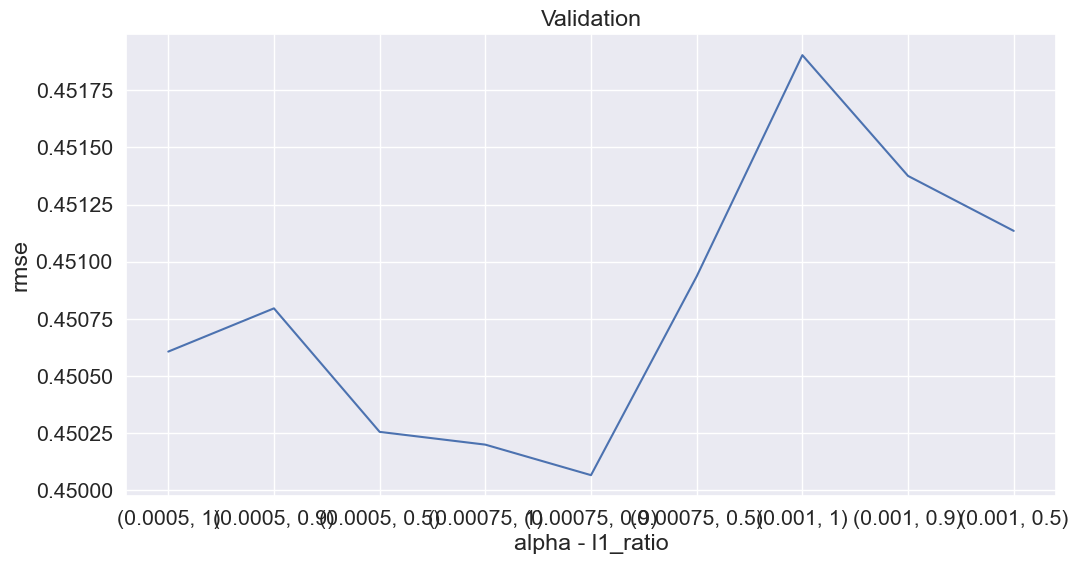

In [178]:
from itertools import product
alphas = [0.0005, 0.00075, 0.001]
l1_ratios = [1, 0.9, 0.5]
cv_elastic = [rmse_cv(ElasticNet(alpha = alpha, l1_ratio=l1_ratio)).mean() 
            for (alpha, l1_ratio) in product(alphas, l1_ratios)]
rcParams['figure.figsize'] = (12.0, 6.0)
idx = list(product(alphas, l1_ratios))
p_cv_elastic = pd.Series(cv_elastic, index = idx)
p_cv_elastic.plot(title = "Validation")
plt.xlabel("alpha - l1_ratio")
plt.ylabel("rmse")

R^2: 0.740
              precision    recall  f1-score   support

           1       0.80      0.83      0.81        29
           2       0.58      0.68      0.62        22
           3       0.97      0.84      0.90        37

    accuracy                           0.80        88
   macro avg       0.78      0.78      0.78        88
weighted avg       0.82      0.80      0.80        88



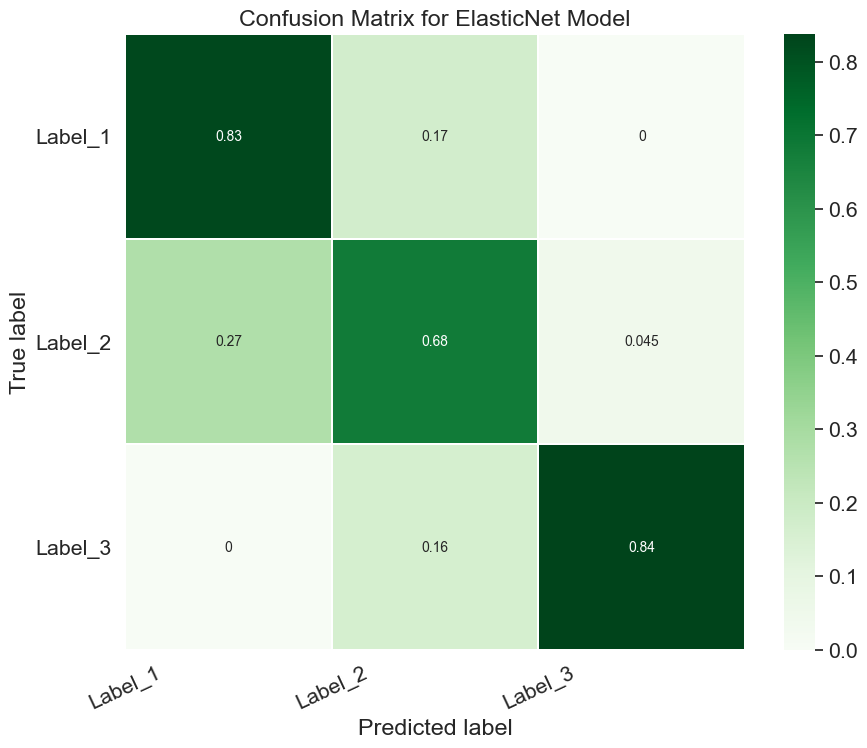

In [197]:
elastic = ElasticNet(alpha=0.00075, l1_ratio=0.9, random_state=42)
elastic.fit(X_train, y_train)
pred = elastic.predict(X_test)
result_int = np.round(pred, 0)
print('R^2: %.3f' %  r2_score(y_test, pred))
print(classification_report(y_test, result_int))
plot_matrix('ElasticNet', y_test, result_int)


Text(0.5, 1.0, 'Elastic Net koefficiensek')

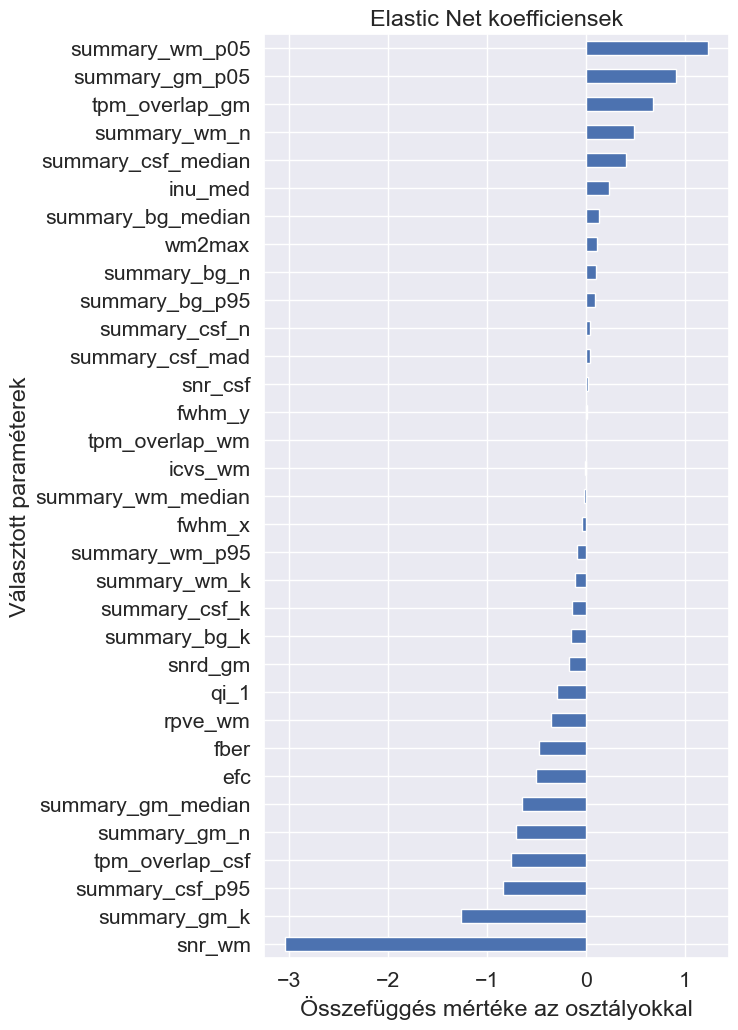

In [198]:
coef = pd.Series(elastic.coef_, index = X_clean.columns)
coef_nonzero = coef[coef!=0].sort_values()
coeff = coef_nonzero.to_frame(name ='coef').reset_index().sort_values(by='coef')
selected_featurenames = coeff['index'].to_list()
coef_vals = coeff.drop('index', axis = 1)
rcParams['figure.figsize'] = (6, 12)
coef_nonzero.plot(kind = "barh")
plt.ylabel('Választott paraméterek')
plt.xlabel('Összefüggés mértéke az osztályokkal')
plt.title("Elastic Net koefficiensek")

In [181]:
#making a dataframe with features above
selected_features = df_features_drop[selected_featurenames]
X = selected_features
selected_cols = X.columns
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X, y, random_state=42, train_size=0.8)

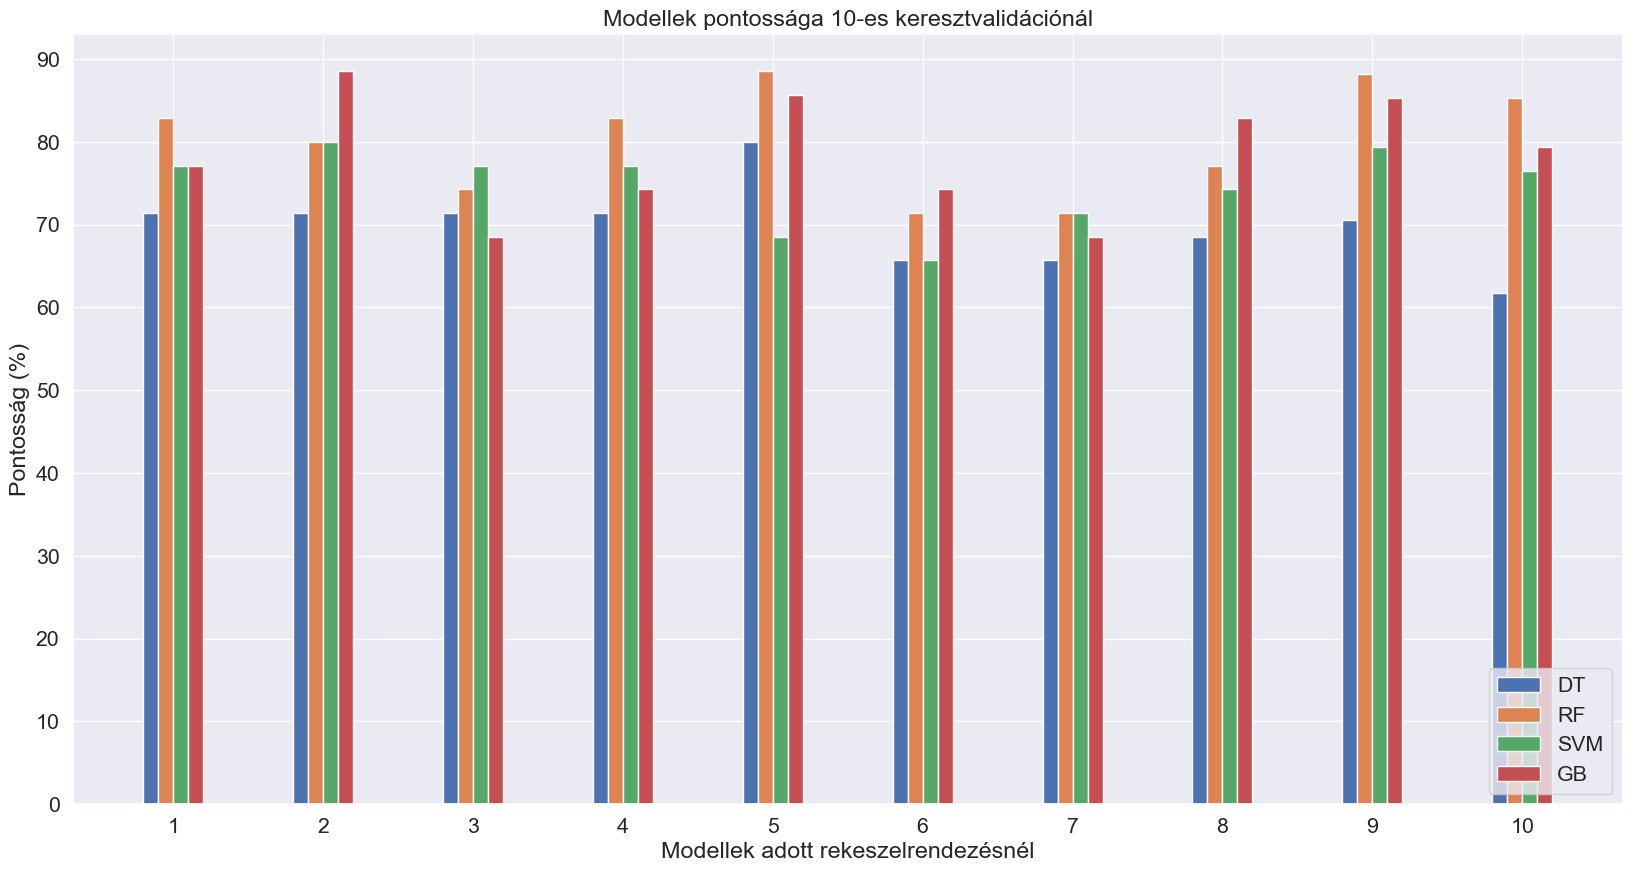

In [199]:
results = {}
names = []
fig, ax = plt.subplots(figsize=(20, 10))

# Initialize the x-axis positions for each group
x = np.arange(1, 11)
bar_width = 0.1

# Iterate over the models
for i, (name, model) in enumerate(models):
    kfold = StratifiedKFold(n_splits=10, )
    cv_results = cross_val_score(model, X_train_sc, y_train_sc, cv=kfold, scoring='accuracy')
    results[name] = (cv_results.mean(), cv_results.std())
    names.append(name)

    # Plotting the accuracy scores for each fold as grouped bars
    ax.bar(x + i * bar_width, cv_results, width=bar_width, label=name)


# Customize the plot
ax.set_xlabel('Modellek adott rekeszelrendezésnél')
ax.set_yticks(np.arange(0, 1, 0.1))
ax.set_yticklabels(np.arange(0, 100, 10))
ax.set_ylabel('Pontosság (%)')
ax.grid(True)
ax.set_title('Modellek pontossága 10-es keresztvalidációnál')
ax.set_xticks(x + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels([str(i) for i in range(1, 11)])
ax.legend(loc='lower right')

plt.show()

In [202]:
#making a dataframe with features above
selected_features_corr = df_features_drop[['cjv', 'cnr', 'fber', 'snr_total', 'snr_wm', 'summary_bg_mean', 'summary_bg_p95', 'summary_bg_stdv', 'summary_gm_mad', 'summary_wm_mad', 'summary_wm_mean', 'summary_wm_p05', 'summary_wm_p95', 'summary_wm_stdv']]
X = selected_features_corr
selected_cols_corr = X.columns
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X, y, random_state=42, train_size=0.8)

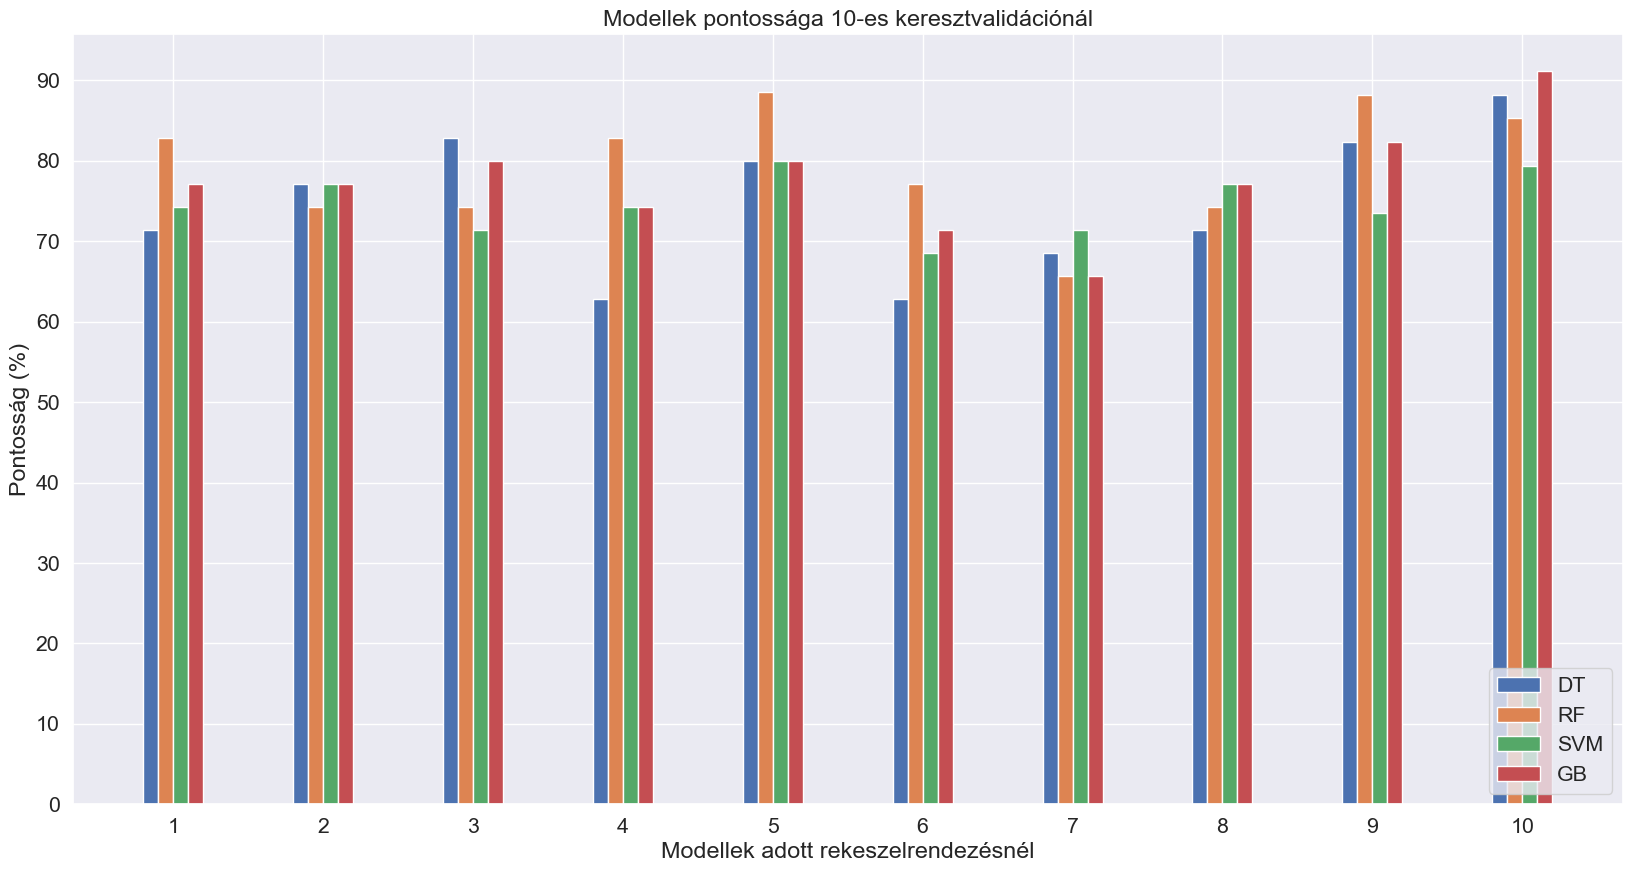

In [203]:
results = {}
names = []
fig, ax = plt.subplots(figsize=(20, 10))

# Initialize the x-axis positions for each group
x = np.arange(1, 11)
bar_width = 0.1

# Iterate over the models
for i, (name, model) in enumerate(models):
    kfold = StratifiedKFold(n_splits=10, )
    cv_results = cross_val_score(model, X_train_corr, y_train_corr, cv=kfold, scoring='accuracy')
    results[name] = (cv_results.mean(), cv_results.std())
    names.append(name)

    # Plotting the accuracy scores for each fold as grouped bars
    ax.bar(x + i * bar_width, cv_results, width=bar_width, label=name)


# Customize the plot
ax.set_xlabel('Modellek adott rekeszelrendezésnél')
ax.set_yticks(np.arange(0, 1, 0.1))
ax.set_yticklabels(np.arange(0, 100, 10))
ax.set_ylabel('Pontosság (%)')
ax.grid(True)
ax.set_title('Modellek pontossága 10-es keresztvalidációnál')
ax.set_xticks(x + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels([str(i) for i in range(1, 11)])
ax.legend(loc='lower right')

plt.show()

Using selected features - but not  TODO!

              precision    recall  f1-score   support

           1       0.79      0.79      0.79        29
           2       0.55      0.50      0.52        22
           3       0.87      0.92      0.89        37

    accuracy                           0.77        88
   macro avg       0.74      0.74      0.74        88
weighted avg       0.77      0.77      0.77        88

accuracy:  0.7727272727272727


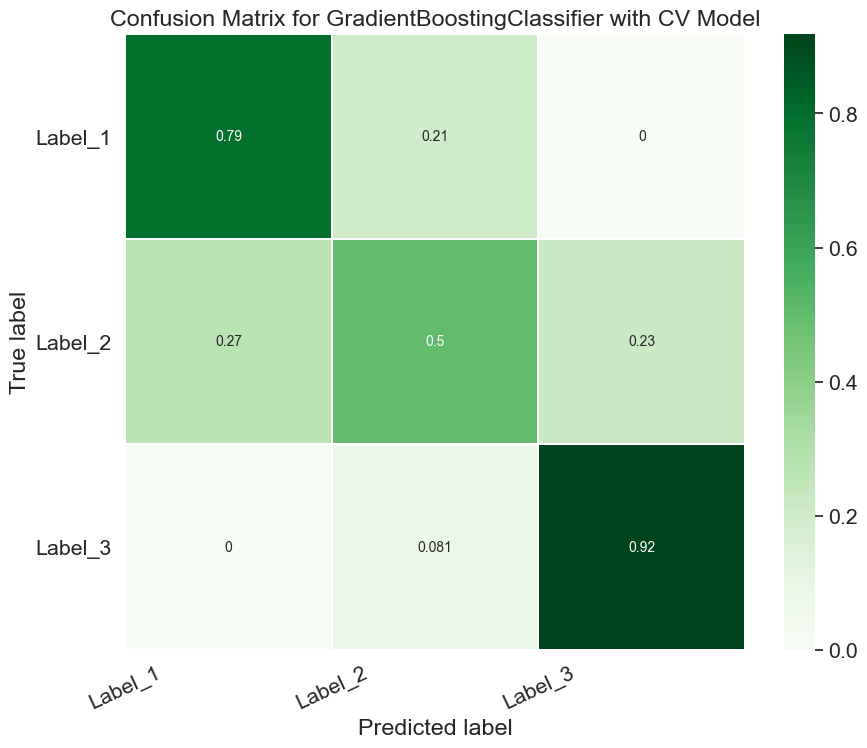

'gradient_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.01, random_state=42, max_depth=5)\n\ngradient_reg.fit(X_train, y_train)\ny_pred_test_reg = gradient_reg.predict(X_test)\nmae = mean_absolute_error(y_test, y_pred_test_reg)\nrmse = np.sqrt(mean_absolute_error(y_test, y_pred_test_reg))\nprint("The Mean Absolute Error of our Model is {}".format(round(mae, 2)))\nprint("The Root of Mean Absolute Error of our Model is {}".format(round(rmse, 2)))\nr2 = r2_score(y_test, y_pred_test_reg)\nprint("The accuracy of our model is {}%".format(round(r2, 2) *100))'

In [191]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

#kf = KFold(n_splits=10,shuffle=False)
#for train_index,val_index in kf.split(X_clean):
#    X_train,X_val = X_clean.iloc[train_index],X_clean.iloc[val_index],
#    y_train,y_val = y_clean.iloc[train_index],y_clean.iloc[val_index]

gradient_booster = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.1, random_state=42, max_depth=5)

gradient_booster.fit(X_train, y_train)
y_pred_test_clean = gradient_booster.predict(X_test)
print(classification_report(y_test,y_pred_test_clean))
print("accuracy: ", accuracy_score(y_test, y_pred_test_clean))
#print("balancedaccuracy: ", balanced_accuracy_score(y, cv_pred))

#plot_matrix('GradientBoostingClassifier', y_test, y_pred_test_clean)

plot_matrix('GradientBoostingClassifier with CV', y_test, y_pred_test_clean)

'''gradient_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.01, random_state=42, max_depth=5)

gradient_reg.fit(X_train, y_train)
y_pred_test_reg = gradient_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test_reg)
rmse = np.sqrt(mean_absolute_error(y_test, y_pred_test_reg))
print("The Mean Absolute Error of our Model is {}".format(round(mae, 2)))
print("The Root of Mean Absolute Error of our Model is {}".format(round(rmse, 2)))
r2 = r2_score(y_test, y_pred_test_reg)
print("The accuracy of our model is {}%".format(round(r2, 2) *100))'''

              precision    recall  f1-score   support

           1       0.80      0.83      0.81        29
           2       0.63      0.55      0.59        22
           3       0.90      0.95      0.92        37

    accuracy                           0.81        88
   macro avg       0.78      0.77      0.77        88
weighted avg       0.80      0.81      0.80        88

accuracy:  0.8068181818181818


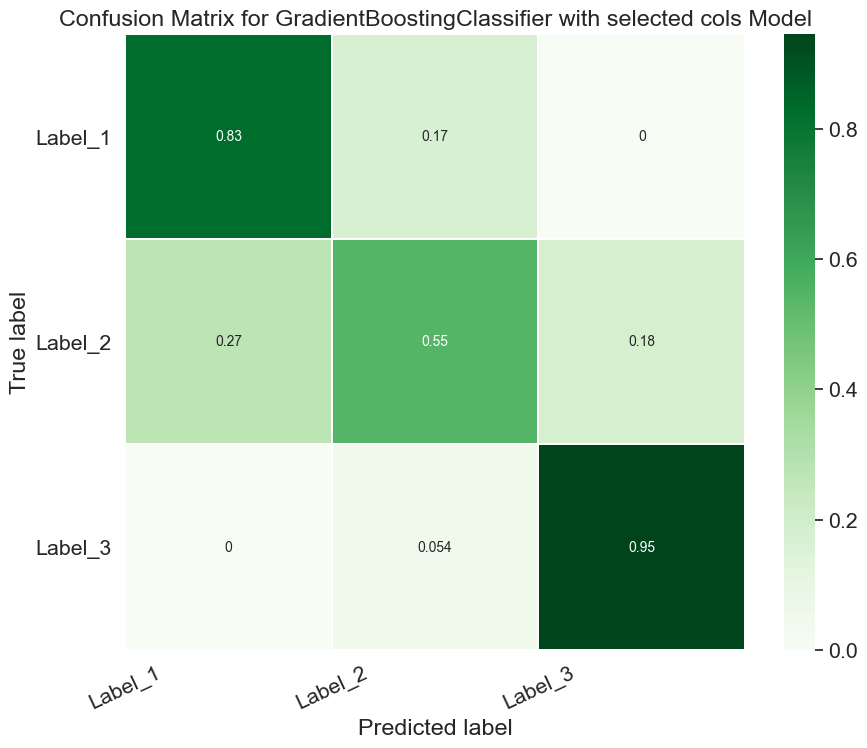

'gradient_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.01, random_state=42, max_depth=5)\n\ngradient_reg.fit(X_train, y_train)\ny_pred_test_reg = gradient_reg.predict(X_test)\nmae = mean_absolute_error(y_test, y_pred_test_reg)\nrmse = np.sqrt(mean_absolute_error(y_test, y_pred_test_reg))\nprint("The Mean Absolute Error of our Model is {}".format(round(mae, 2)))\nprint("The Root of Mean Absolute Error of our Model is {}".format(round(rmse, 2)))\nr2 = r2_score(y_test, y_pred_test_reg)\nprint("The accuracy of our model is {}%".format(round(r2, 2) *100))'

In [194]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

#kf = KFold(n_splits=10,shuffle=False)
#for train_index,val_index in kf.split(X_clean):
#    X_train,X_val = X_clean.iloc[train_index],X_clean.iloc[val_index],
#    y_train,y_val = y_clean.iloc[train_index],y_clean.iloc[val_index]

gradient_booster = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.1, random_state=42, max_depth=5)

gradient_booster.fit(X_train_sc, y_train_sc)
y_pred_test_clean = gradient_booster.predict(X_test_sc)
print(classification_report(y_test_sc,y_pred_test_clean))
print("accuracy: ", accuracy_score(y_test_sc, y_pred_test_clean))
#print("balancedaccuracy: ", balanced_accuracy_score(y, cv_pred))

#plot_matrix('GradientBoostingClassifier', y_test, y_pred_test_clean)

plot_matrix('GradientBoostingClassifier with selected cols', y_test_sc, y_pred_test_clean)

'''gradient_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.01, random_state=42, max_depth=5)

gradient_reg.fit(X_train, y_train)
y_pred_test_reg = gradient_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test_reg)
rmse = np.sqrt(mean_absolute_error(y_test, y_pred_test_reg))
print("The Mean Absolute Error of our Model is {}".format(round(mae, 2)))
print("The Root of Mean Absolute Error of our Model is {}".format(round(rmse, 2)))
r2 = r2_score(y_test, y_pred_test_reg)
print("The accuracy of our model is {}%".format(round(r2, 2) *100))'''

In [ ]:
#feature_importances_df.to_csv('feature_importances.csv')

In [189]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=1000)
gb_reg.fit(X_train, y_train)
y_pred_test_reg = gb_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test_reg)
rmse = np.sqrt(mean_absolute_error(y_test, y_pred_test_reg))
print("The Mean Absolute Error of our Model is {}".format(round(mae, 2)))
print("The Root of Mean Absolute Error of our Model is {}".format(round(rmse, 2)))
r2 = r2_score(y_test, y_pred_test_reg)
print("The accuracy of our model is {}%".format(round(r2, 2) *100))

The Mean Absolute Error of our Model is 0.28
The Root of Mean Absolute Error of our Model is 0.53
The accuracy of our model is 79.0%


As the model with the best accuracy, I calculate the feature importances

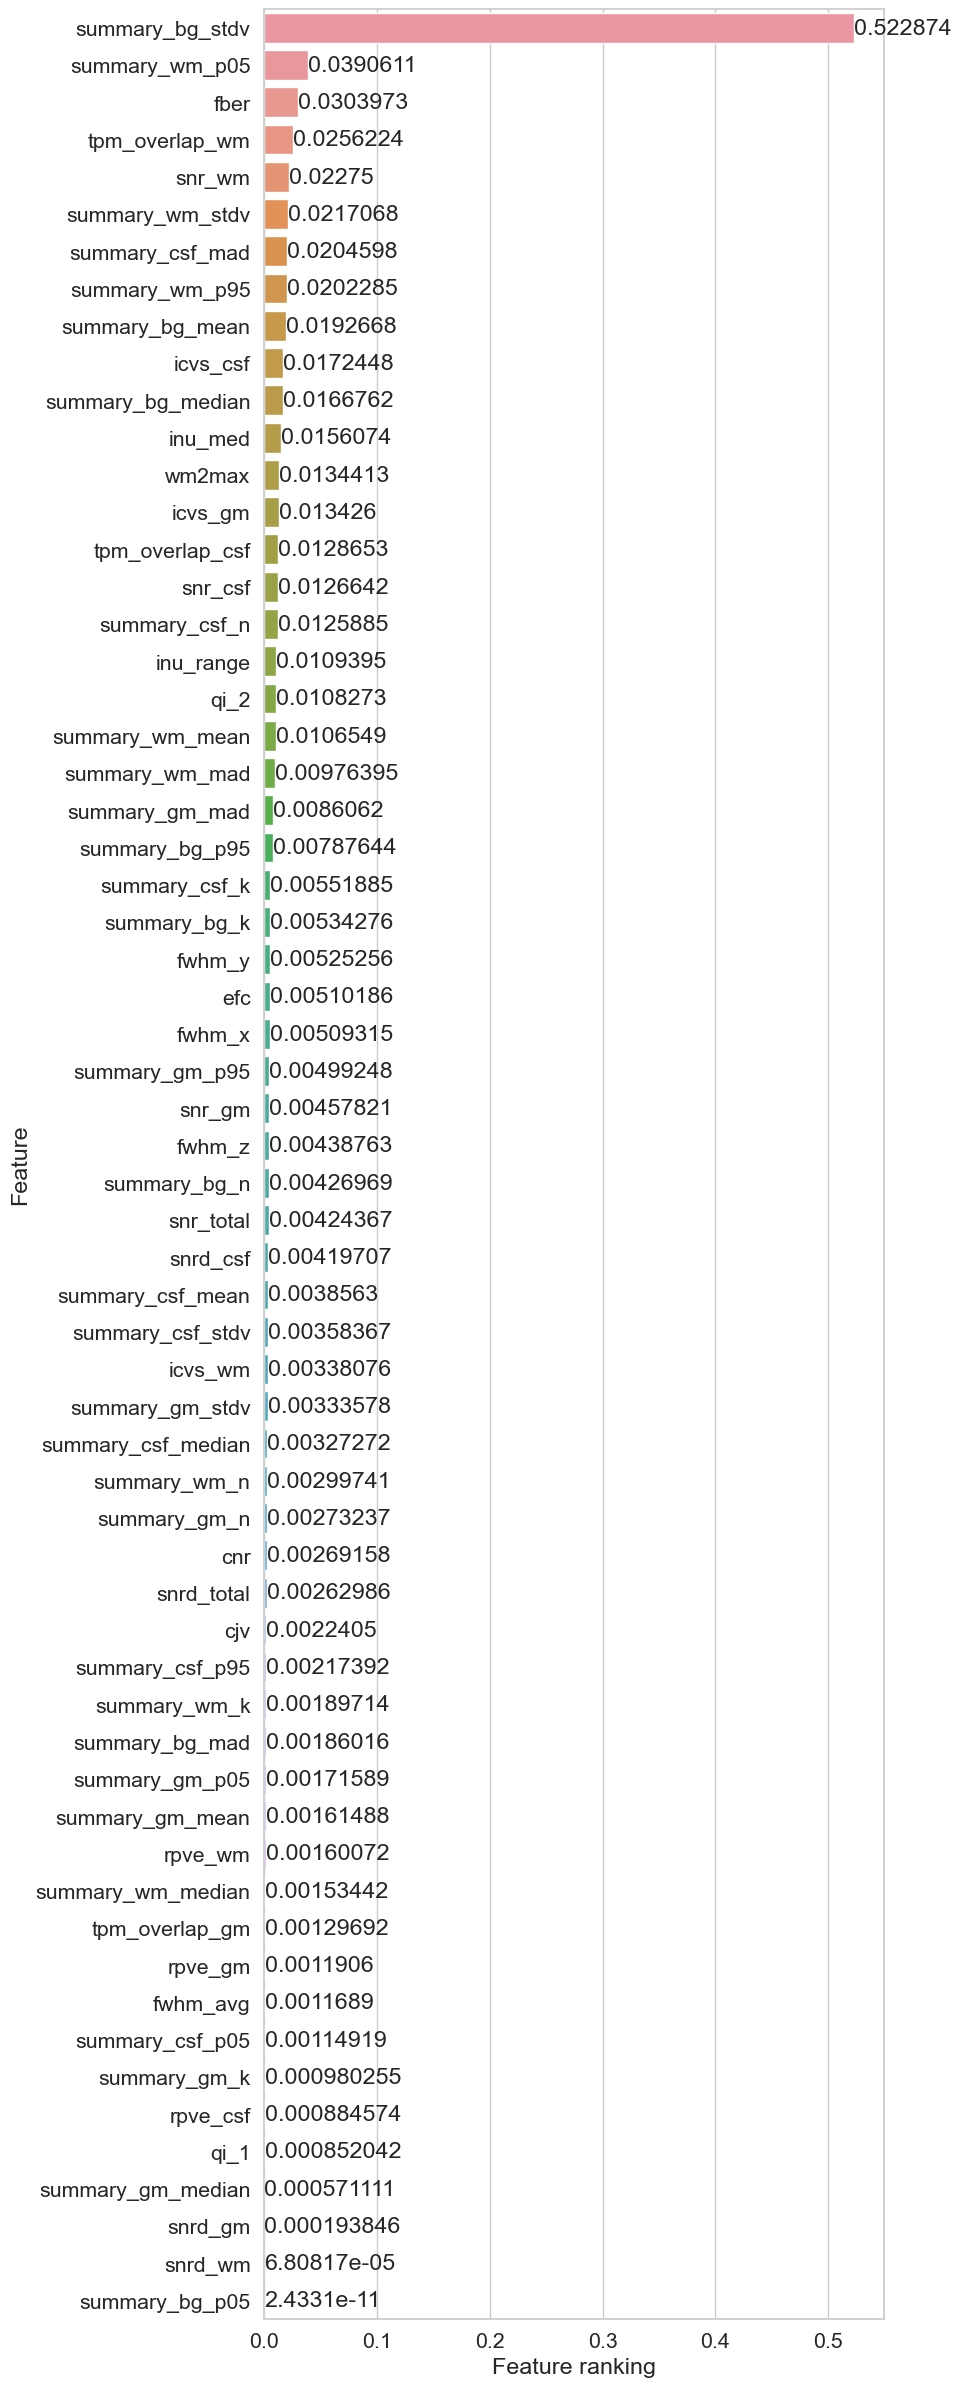

In [192]:
#feature_importance = gradient_booster.feature_importances_
plot_importances_features(gradient_booster, cols_2)
#plt.figure(figsize=(8, 50))

Cross Validation Scores:  [0.74418605 0.74418605 0.86046512 0.71428571 0.69047619 0.76190476
 0.69047619 0.88095238 0.80952381 0.80952381]
Average CV Score:  0.7705980066445182
Number of CV Scores used in Average:  10
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       121
           2       1.00      1.00      1.00       109
           3       1.00      1.00      1.00       193

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423

accuracy:  1.0


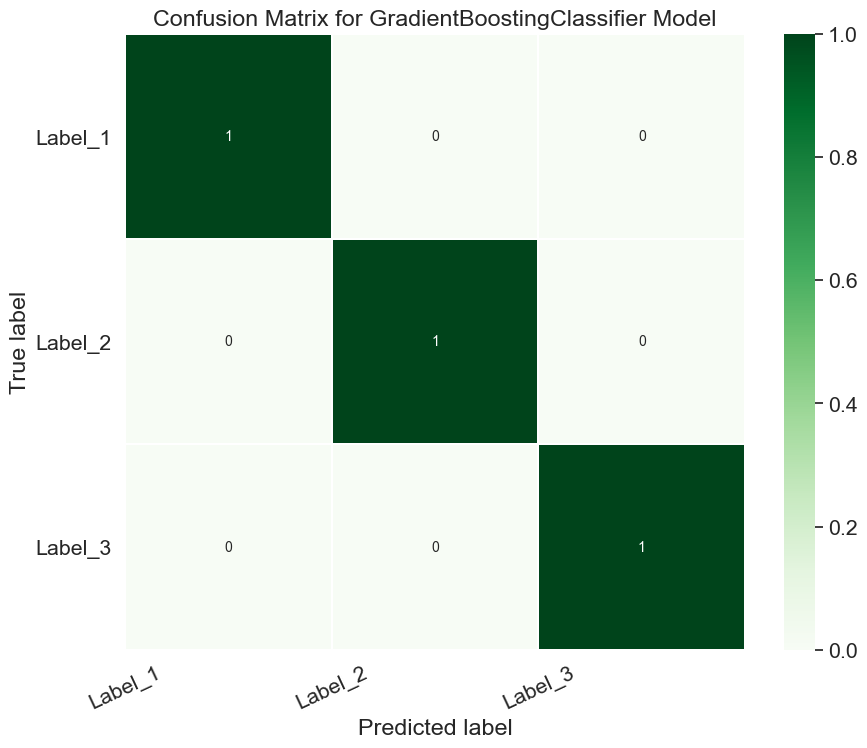

In [ ]:

#using k-fold
kf = KFold(n_splits=10)
scores = cross_val_score(gradient_booster, X_clean, y_clean, cv = kf)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
gradient_booster.fit(X_clean, y_clean)
y_pred_test_clean = gradient_booster.predict(X_clean)
print(classification_report(y_clean,gradient_booster.predict(X_clean)))
print("accuracy: ", accuracy_score(y_clean, gradient_booster.predict(X_clean)))
#confusion_matrix(y_test, y_pred_test_clean)
# Get and reshape confusion matrix data
cv_pred = cross_val_predict(gradient_booster, X_clean, y_clean, cv=10)
plot_matrix('GradientBoostingClassifier', y_clean, y_pred_test_clean)

In [ ]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


[13:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[13:23:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.97      1.00      0.98       121
           2       1.00      0.95      0.98       109
           3       0.99      1.00      1.00       193

    accuracy                           0.99       423
   macro avg       0.99      0.98      0.99       423
weighted avg       0.99      0.99      0.99       423

accuracy:  0.9881796690307328


c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


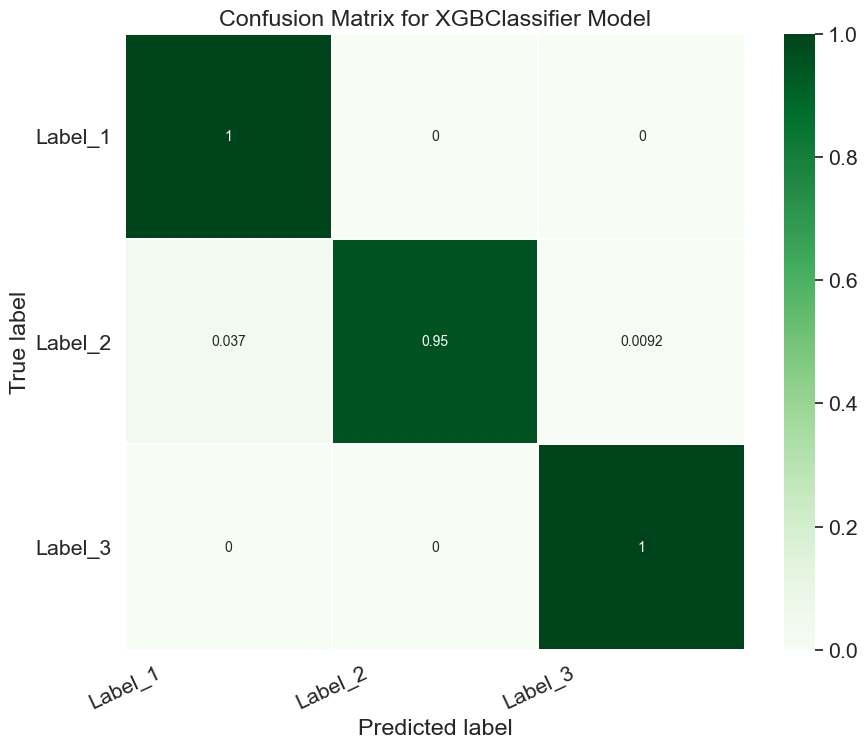

In [ ]:
import xgboost as xgb

xgc = xgb.XGBClassifier(random_state=42, n_jobs=4, max_depth=7,learning_rate=0.01,
                     silent=1,eta=1,objective='mlogloss')
xgc.fit(X_clean, y_clean)
y_pred_test_clean = xgc.predict(X_clean)
#most_important_cols = df_features_clean[['summary_bg_stdv', 'tpm_overlap_wm','fwhm_x','summary_bg_median', 'summary_csf_n', 'summary_wm_mean', 'summary_wm_k', 'fwhm_avg', 'fber']]
#X_train_mic, X_test_mic, y_train_mic, y_test_mic = train_test_split(most_important_cols, y_clean, random_state=42, test_size=0.3, stratify=y_clean)

print(classification_report(y_clean,xgc.predict(X_clean)))
print("accuracy: ", accuracy_score(y_clean, xgc.predict(X_clean)))
#kfold = KFold(n_splits=10, shuffle=True)
#kf_cv_scores = cross_val_score(xgc, X_train, y_train, cv=kfold )
#print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
#confusion_matrix(y_test, y_pred_test_clean)
# Get and reshape confusion matrix data
plot_matrix('XGBClassifier', y_clean, y_pred_test_clean)

In [ ]:
plot_importances_features(xgc, cols_2)
output = cross_validate(xgc, X_clean, y_clean, cv=10, scoring = 'accuracy', return_estimator =True)
for idx,estimator in enumerate(output['estimator']):
    #print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = cols_2,
                                        columns=['importance'])  #.sort_values('importance', ascending=False)
    feature_importances_df['XGC'] = feature_importances['importance']

NameError: name 'xgc' is not defined

              precision    recall  f1-score   support

           1       0.89      0.98      0.93       121
           2       0.90      0.80      0.84       109
           3       0.96      0.96      0.96       193

    accuracy                           0.92       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.92      0.92      0.92       423

0.9219858156028369


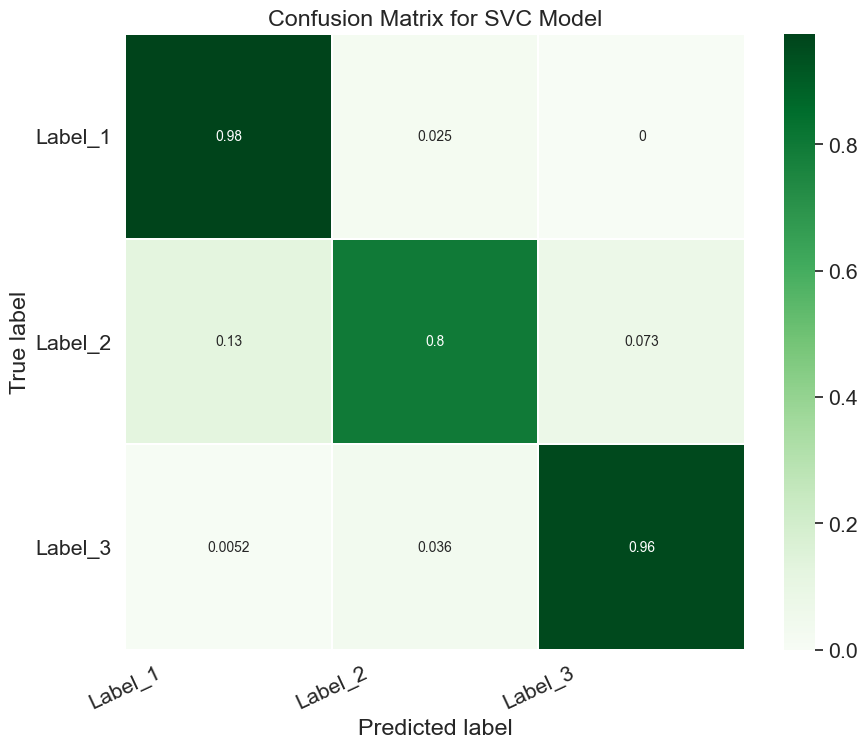

In [ ]:
from sklearn.svm import SVC
#kf = KFold(n_splits=10,shuffle=False)
#for train_index,val_index in kf.split(X_clean):
#    X_train,X_val = X_clean.iloc[train_index],X_clean.iloc[val_index],
#    y_train,y_val = y_clean.iloc[train_index],y_clean.iloc[val_index]
model_SV = SVC(random_state=42, kernel="poly", degree=3, coef0=1, C=1)
model_SV.fit(X_clean,y_clean)
y_pred_test_clean = model_SV.predict(X_clean)
print(classification_report(y_clean,model_SV.predict(X_clean)))
print(accuracy_score(y_clean, model_SV.predict(X_clean)))
#confusion_matrix(y_test, y_pred_test_clean)
# Get and reshape confusion matrix data
plot_matrix('SVC',y_clean, y_pred_test_clean)

In [ ]:
from sklearn.model_selection import GridSearchCV

model_RF = RandomForestClassifier(random_state = 42)
gradient_booster = GradientBoostingClassifier(random_state=42, verbose=True)

param_grid = [{
    "learning_rate": [0.01, 0.025],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "n_estimators":[50,100]
    }]
'''
param_grid = [{
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [1, 5, 10, 20],
    "n_estimators": [100, 300, 500],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}]
'''
cv = GridSearchCV(gradient_booster, param_grid, cv=10, verbose=True, n_jobs=4)
cv.fit(X, y)
print(cv.best_params_)
print(cv.best_score_)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\ba

      Iter       Train Loss   Remaining Time 
         1           1.0218            2.49s
         2           0.9791            3.16s
         3           0.9397            3.33s
         4           0.9040            3.52s
         5           0.8670            3.57s
         6           0.8350            3.72s
         7           0.8040            3.74s
         8           0.7741            3.81s
         9           0.7446            3.78s
        10           0.7170            3.72s
        20           0.5016            3.40s
        30           0.3597            3.22s
        40           0.2600            2.62s
        50           0.1915            2.10s
        60           0.1410            1.58s
        70           0.1045            1.17s
        80           0.0780            0.77s
        90           0.0584            0.37s
       100           0.0442            0.00s
{'criterion': 'friedman_mse', 'learning_rate': 0.025, 'max_depth': 8, 'max_features': 'log2', 'n_es

      Iter       Train Loss   Remaining Time 
         1           1.0378            3.03s
         2           1.0129            3.53s
         3           0.9873            3.42s
         4           0.9629            5.06s
         5           0.9398            4.41s
         6           0.9185            4.14s
         7           0.8967            3.76s
         8           0.8764            3.66s
         9           0.8567            3.59s
        10           0.8377            3.36s
        20           0.6904            2.79s
        30           0.5871            2.34s
        40           0.5107            2.13s
        50           0.4526            1.63s
        60           0.4065            1.26s
        70           0.3694            0.93s
        80           0.3374            0.63s
        90           0.3102            0.31s
       100           0.2878            0.00s
              precision    recall  f1-score   support

           1       0.89      0.97      0.92 

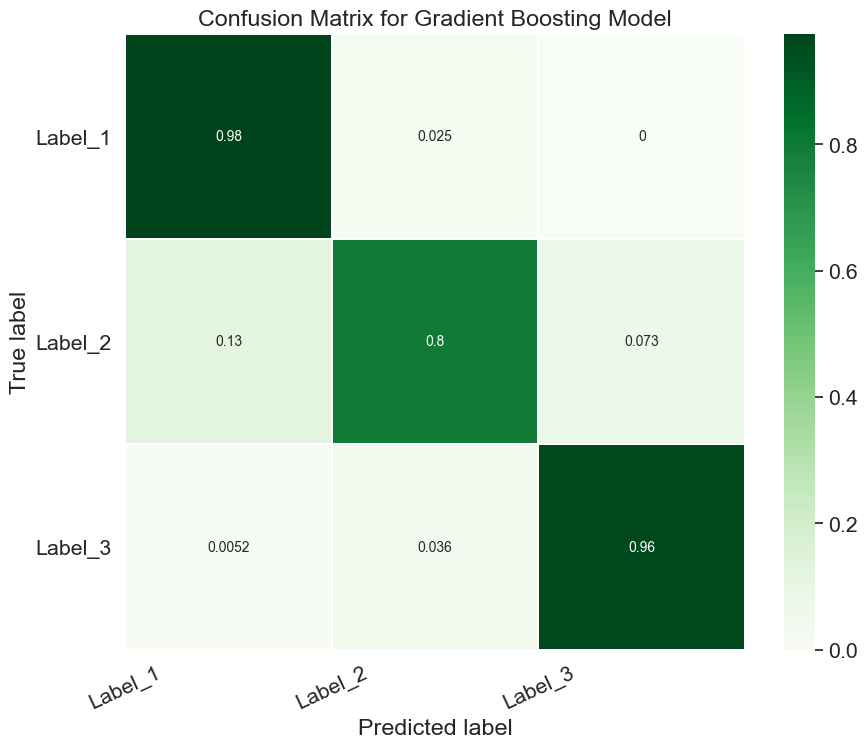

In [ ]:
gradient_booster_best = GradientBoostingClassifier(random_state=42, verbose=True, criterion = 'friedman_mse', learning_rate= 0.025, max_depth=3, max_features= 'sqrt', n_estimators= 100)
gradient_booster_best.fit(X_clean, y_clean)
pred_gr = gradient_booster_best.predict(X_clean)
print(classification_report(y_clean,gradient_booster_best.predict(X_clean)))
matrix = confusion_matrix(y_clean, y_pred_test_clean)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Label_1','Label_2', 'Label_3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()


# Clustering

c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

1 : 1.345233932254526
2 : 1.1294500211835161
3 : 1.0597542632523913
4 : 1.0265652667981013
5 : 0.9977890108481199
6 : 0.9790163927094836
7 : 0.9598881042723064
8 : 0.9428413729302236
9 : 0.9320169975470646
10 : 0.9226053962052245
11 : 0.9114316089293109
12 : 0.8999802442030023
13 : 0.890501567360121
14 : 0.8817920992915723


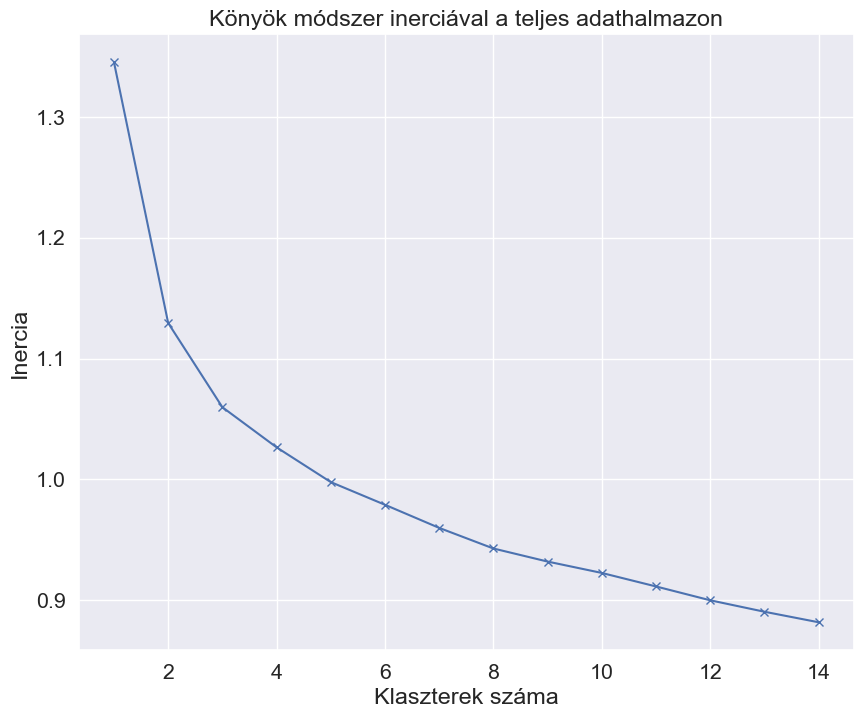

In [208]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
X = df_features_drop
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_features_drop)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(df_features_drop, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(df_features_drop, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Klaszterek száma')
plt.ylabel('Inercia')
plt.title('Könyök módszer inerciával a teljes adathalmazon')
plt.show()

In [209]:
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 4.3 MB/s eta 0:00:00


c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Felhasznalo\anaconda3\envs\biomedical_ai_enyem\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

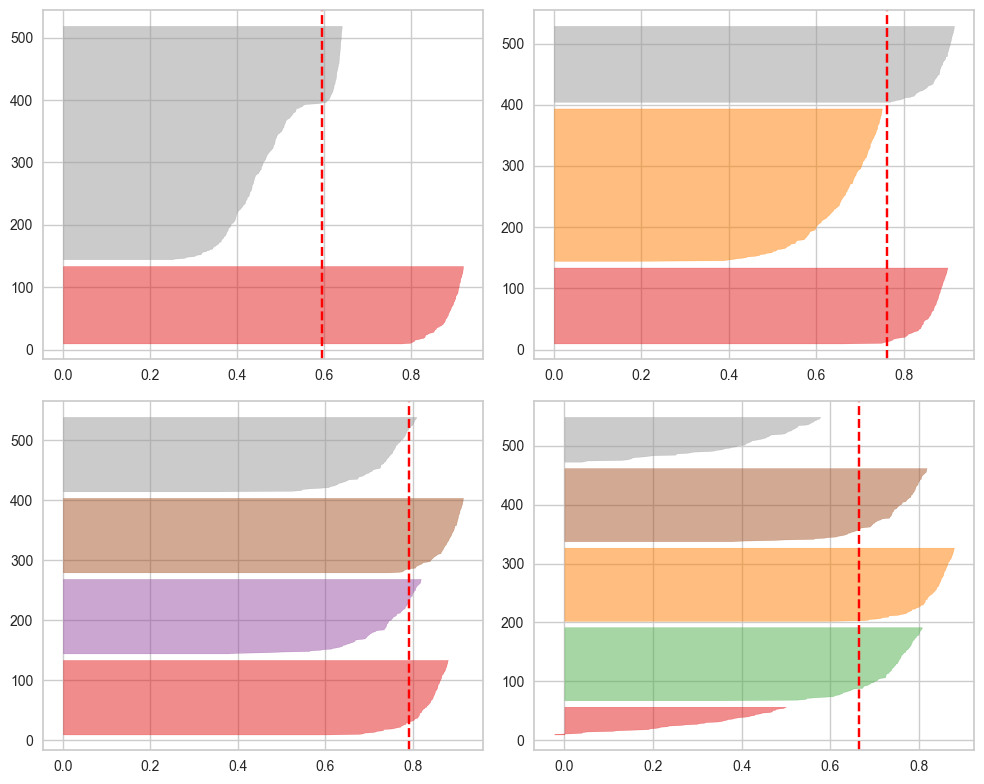

In [213]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer

# Generate sample data
X, y = make_blobs(n_samples=500, n_features=2, centers=4, random_state=42)

# Define the numbers of clusters
n_clusters = [2, 3, 4, 5]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()

# Iterate over different numbers of clusters
for i, n_cluster in enumerate(n_clusters):
    # Instantiate the KMeans model
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)

    # Fit the model to the data
    kmeans.fit(X)

    # Instantiate the SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, ax=axs[i])

    # Fit the visualizer to the data
    visualizer.fit(X)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


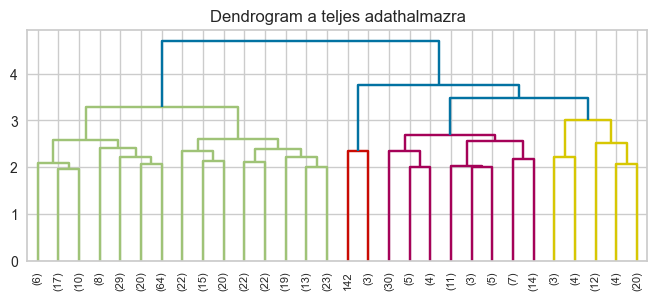

In [218]:
from scipy.cluster import hierarchy

fig, axes = plt.subplots(figsize=(8, 3))
Z = hierarchy.linkage(df_features_drop, 'complete')
hierarchy.dendrogram(Z, leaf_rotation=90,ax=axes, leaf_font_size=8, truncate_mode='lastp')
plt.title('Dendrogram a teljes adathalmazra')
plt.show()

In [ ]:
cols_2

Index(['cjv', 'cnr', 'efc', 'fber', 'fwhm_avg', 'fwhm_x', 'fwhm_y', 'fwhm_z',
       'icvs_csf', 'icvs_gm', 'icvs_wm', 'inu_med', 'inu_range', 'qi_1',
       'qi_2', 'rpve_csf', 'rpve_gm', 'rpve_wm', 'snr_csf', 'snr_gm',
       'snr_total', 'snr_wm', 'snrd_csf', 'snrd_gm', 'snrd_total', 'snrd_wm',
       'summary_bg_k', 'summary_bg_mad', 'summary_bg_mean',
       'summary_bg_median', 'summary_bg_n', 'summary_bg_p05', 'summary_bg_p95',
       'summary_bg_stdv', 'summary_csf_k', 'summary_csf_mad',
       'summary_csf_mean', 'summary_csf_median', 'summary_csf_n',
       'summary_csf_p05', 'summary_csf_p95', 'summary_csf_stdv',
       'summary_gm_k', 'summary_gm_mad', 'summary_gm_mean',
       'summary_gm_median', 'summary_gm_n', 'summary_gm_p05', 'summary_gm_p95',
       'summary_gm_stdv', 'summary_wm_k', 'summary_wm_mad', 'summary_wm_mean',
       'summary_wm_median', 'summary_wm_n', 'summary_wm_p05', 'summary_wm_p95',
       'summary_wm_stdv', 'tpm_overlap_csf', 'tpm_overlap_gm',
      